In [1]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import scipy
from scipy import stats
import math

import seaborn as sns

e_0 = 8.8541878128e-12
fc = 50000000
pi = 3.141592653589793
pd.set_option('display.max_columns', None)

In [2]:
#dm = pd.merge(dh, dms, on="SAMPLE")
#dm.to_excel("Hysteresis_.xlsx")
"""     Reading the data of the IOP soil pyshical and chemical properties database  """

diop = pd.read_excel("IOP_DataBase.xlsx")
#dm = pd.merge(dm, diop, on="SAMPLE")
#pd.set_option('display.max_rows', None)
dm = pd.read_excel("Hysteresis_2.xlsx")

dm['Hc_T'] = dm.Hc/10000
dm['Hcr_T'] = dm.Hcr/10000

dm['Hc_kAm'] = dm.Hc*0.0795774
dm['Hcr_kAm'] = dm.Hcr*0.0795774

dm['Hrel'] = dm.Hcr/dm.Hc
dm['Mrel'] = dm.Mrs/dm.Ms
dm['SIRM_F1mass'] = dm.Mrs/dm.F1mass
dm['N'] = (dm.Hrel - 1)/dm.Kre_F1
dm['Ndemag'] = dm.Hc/dm.Mrs                                         # Defined in Dunlop 2002 (1) pag 3
dm['Xmd '] = dm.Kre_F1*(1+dm.Ndemag*dm.Kre_F1)**-1                  # Defined in Dunlop 2002 (1) pag 3
dm['p'] = (dm.Mrs/dm.Ms)*(dm.Hcr/dm.Hc)                  # Defined in Dunlop 2002 (1) pag 3

dm['dHcr'] = dm.Hcr - dm.Hcr_unc
dm['dHc'] = dm.Hc - dm.Hc_unc
dm['dMrs'] = dm.Mrs - dm.Mrs_unc
dm['dMs'] = dm.Ms - dm.Ms_unc

dm = dm[dm.Hc > 0.0]
dm = dm[dm.Hcr > 0.0]

#dm

In [3]:
#dm.describe()


In [4]:
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
dmcorr = dm.corr()
#dmcorr

C:\Users\mendo\AppData\Local\Temp\ipykernel_4288\785637678.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dmcorr = dm.corr()


In [5]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

pval = calculate_pvalues(dm)

c:\Users\mendo\anaconda3_2\Lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [6]:
pval

,Unnamed: 0,Hcr,Hc,Mrs,Ms,Hcr_unc,Hc_unc,Mrs_unc,Ms_unc,Mmax,Area_loops,S*,NUMBER,Duration,Depth,Kre_F1,Kim_F1,Ph_F1,Mass,#_y,Rg_F3,Kre_F3,Kim_F3,Ph_F3,F1mass,F3mass,kfd_abs,kfd,SiO2,SiO2 Error,MgO,MgO Error,Al2O3,Al2O3 Error,Mo,Mo Error,Zr,Zr Error,Sr,Sr Error,U,U Error,Rb,Rb Error,Th,Th Error,Pb,Pb Error,Au,Au Error,Se,Se Error,As,As Error,Hg,Hg Error,Zn,Zn Error,W,W Error,Cu,Cu Error,Ni,Ni Error,Co,Co Error,Fe,Fe Error,Mn,Mn Error,Cr,Cr Error,V,V Error,Ti,Ti Error,Ca,Ca Error,K,K Error,S,S Error,Ba,Ba Error,Sb,Sb Error,Sn,Sn Error,Cd,Cd Error,Ag,Ag Error,Pd,Pd Error,Bal,Bal Error,Nb,Nb Error,Bi,Bi Error,Re,Re Error,Ta,Ta Error,Hf,Hf Error,Al,Al Error,P,P Error,Si,Si Error,Cl,Cl Error,Mg,Mg Error,Sc,Sc Error,Cs,Cs Error,Te,Te Error,copeky,Bulk_density,copeky_depth,Carbone,Humus,pH_eau,CEC,Clay,Silt_fine,Silt_coarse,Silt,Sand_finr,Sand_coarse,Sand,Battance,CaCO,Hc_T,Hcr_T,Hc_kAm,Hcr_kAm,Hrel,Mrel,SIRM_F1mass,N,Ndemag,Xmd,p,dHcr,dHc,dMrs,dMs
Unnamed: 0,0.0,0.2749,0.0903,0.0005,0.0023,0.4365,0.2585,0.0016,0.042,0.6269,0.2912,0.9958,0.0,0.0932,0.0538,0.0001,0.0,0.0014,0.0001,0.0,NaN,0.0001,0.9563,0.0752,0.0,0.0,0.0,0.4342,0.0312,NaN,0.039,NaN,0.006,NaN,0.0898,0.0,0.005,0.0016,0.0003,0.0001,NaN,0.0,0.0,0.0,0.0,0.0259,0.0001,0.0,NaN,0.0018,NaN,0.0018,0.0177,0.0136,0.6516,0.0624,0.0312,0.0022,NaN,0.0008,0.0037,0.0616,0.1792,0.9715,0.4089,0.0442,0.0333,0.0097,0.1792,0.0534,0.3581,0.7758,0.0001,0.0008,0.0,0.0001,0.0229,0.0187,0.001,0.0001,0.9928,0.0878,0.003,0.0009,NaN,0.6348,0.6584,0.6352,0.2899,0.0018,0.4692,0.7215,0.7807,0.6731,0.2574,0.0076,0.0,0.9899,0.0,0.4157,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.001,0.1047,0.2457,0.0312,0.6794,0.9899,0.0058,0.0599,0.4576,0.0195,0.023,NaN,0.0149,NaN,0.0295,0.205,0.017,0.0529,0.094,0.0938,0.2062,0.0744,0.0714,0.0,0.0,0.0,0.0,0.0664,0.0,0.0008,0.0389,0.0903,0.2749,0.0903,0.2749,0.7585,0.2554,0.3102,0.0006,0.0353,0.0076,0.877,0.9677,0.39,0.0024,0.0574
Hcr,0.2749,0.0,0.0,0.0283,0.0005,0.0,0.7752,0.0208,0.4738,0.0066,0.0715,0.9865,0.4059,0.9637,0.0081,0.0143,0.0298,0.4053,0.7606,0.7953,NaN,0.0153,0.8427,0.9401,0.0214,0.0229,0.0165,0.2404,0.1612,NaN,0.0624,NaN,0.002,NaN,0.2596,0.0561,0.9539,0.5402,0.0195,0.0178,NaN,0.1137,0.4582,0.244,0.3714,0.2175,0.0086,0.1194,NaN,0.0299,NaN,0.0393,0.6594,0.6708,0.1727,0.5793,0.2062,0.5525,NaN,0.0298,0.0428,0.2474,0.0042,0.018,0.0427,0.0095,0.1576,0.183,0.1373,0.0981,0.5973,0.2615,0.0738,0.0438,0.8228,0.2387,0.0238,0.0232,0.3073,0.072,0.0317,0.7972,0.5898,0.7931,NaN,0.0762,0.4282,0.3963,0.506,0.0755,0.8502,0.7629,0.8352,0.848,0.091,0.0006,0.2625,0.5602,0.3953,0.4684,NaN,NaN,NaN,NaN,NaN,NaN,0.002,0.0034,0.0039,0.4646,0.1612,0.5808,0.5602,0.0389,0.0493,0.9277,0.0943,0.0307,NaN,0.0078,NaN,0.0082,0.0332,0.1278,0.0036,0.0031,0.0025,0.0369,0.5284,0.4724,0.4214,0.519,0.4659,0.3031,0.9196,0.3636,0.3614,0.0332,0.0,0.0,0.0,0.0,0.0628,0.0107,0.2194,0.3718,0.0014,0.0,0.0008,0.0,0.0,0.0186,0.3777
Hc,0.0903,0.0,0.0,0.5244,0.0121,0.0,0.0318,0.4293,0.9326,0.1746,0.0347,0.8348,0.2019,0.1913,0.5734,0.0767,0.2356,0.5301,0.4292,0.3388,NaN,0.0745,0.4201,0.8986,0.0982,0.0957,0.1963,0.6358,0.1377,NaN,0.047,NaN,0.0041,NaN,0.8775,0.081,0.7393,0.3735,0.0001,0.0004,NaN,0.0248,0.1187,0.0648,0.0508,0.5837,0.1501,0.5656,NaN,0.0385,NaN,0.0609,0.9072,0.4881,0.4208,0.3653,0.4121,0.8627,NaN,0.0341,0.3046,0.949,0.0098,0.0152,0.0145,0.0924,0.5343,0.4312,0.3586,0.3024,0.7836,0.5348,0.0463,0.0814,0.4941,0.2897,0.0002,0.0019,0.1365,0.0984,0.5018,0.56,0.6863,0.6252,NaN,0.205,0.4563,0.0967,0.5301,0.078,0.6715,0.7776,0.9346,0.3408,0.0364,0.0008,0.1064,0.8251,0.0804,0.4201,NaN,NaN,NaN,NaN,NaN,NaN,0.0041,0.0008,0.1593,0.5639,0.1377,0.6988,0.8251,0.0048,0.0437,0.4956,0.0024,0.0067,NaN,0.032,NaN,0.0454,0.0579,0.3349,0.3434,0.0814,0.0776,0.0566,0.9237,0.5695,0.0947,0.2158,0.149,0.1745,0.436,0.1495,0.5416,0.0002,0.0,0.0,0.0,0.0,0.0,0.0,0.7857,0.2305,0.0335,0.0048,0.0072,0.0006,0.0,0.3957,0.8389
Mrs,0.0005,0.0283,0.5244,0.0,0.0,0.0173,0.001,0.0,0.9802,0.0,0.3298,0.6758,0.0003,0.1038,0.0005,0.0,0.0,0.0026,0.0013,0.011,

In [7]:
#columns = np.full((dmcorr.shape[0],), True, dtype=bool)
#for i in range(dmcorr.shape[0]):
#   for j in range(i+1, dmcorr.shape[0]):
#        if pval.iloc[i, j] <= 0.05:
#            dmcorr[i, j] = math.nan
       

In [8]:
dmcorr

,Unnamed: 0,Hcr,Hc,Mrs,Ms,Hcr_unc,Hc_unc,Mrs_unc,Ms_unc,Mmax,Area_loops,S*,NUMBER,Duration,Depth,Kre_F1,Kim_F1,Ph_F1,Mass,#_y,Rg_F3,Kre_F3,Kim_F3,Ph_F3,F1mass,F3mass,kfd_abs,kfd,SiO2,SiO2 Error,MgO,MgO Error,Al2O3,Al2O3 Error,Mo,Mo Error,Zr,Zr Error,Sr,Sr Error,U,U Error,Rb,Rb Error,Th,Th Error,Pb,Pb Error,Au,Au Error,Se,Se Error,As,As Error,Hg,Hg Error,Zn,Zn Error,W,W Error,Cu,Cu Error,Ni,Ni Error,Co,Co Error,Fe,Fe Error,Mn,Mn Error,Cr,Cr Error,V,V Error,Ti,Ti Error,Ca,Ca Error,K,K Error,S,S Error,Ba,Ba Error,Sb,Sb Error,Sn,Sn Error,Cd,Cd Error,Ag,Ag Error,Pd,Pd Error,Bal,Bal Error,Nb,Nb Error,Bi,Bi Error,Re,Re Error,Ta,Ta Error,Hf,Hf Error,Al,Al Error,P,P Error,Si,Si Error,Cl,Cl Error,Mg,Mg Error,Sc,Sc Error,Cs,Cs Error,Te,Te Error,copeky,Bulk_density,copeky_depth,Carbone,Humus,pH_eau,CEC,Clay,Silt_fine,Silt_coarse,Silt,Sand_finr,Sand_coarse,Sand,Battance,CaCO,Hc_T,Hcr_T,Hc_kAm,Hcr_kAm,Hrel,Mrel,SIRM_F1mass,N,Ndemag,Xmd,p,dHcr,dHc,dMrs,dMs
Unnamed: 0,1.000000,-0.282073,-0.227651,0.095823,0.168180,-0.311555,-0.032453,0.165108,0.158193,-0.224818,0.109893,0.043756,-0.256415,-0.164288,0.459953,0.075948,-0.072997,-0.158645,0.316677,-0.681288,0.158876,0.074760,0.077020,0.224504,0.048948,0.048123,0.057628,0.043250,-0.230962,NaN,-0.074238,NaN,-0.072071,NaN,-0.067781,-0.464960,-0.476594,-0.422292,0.236771,0.149007,NaN,-0.145949,-0.093457,-0.126800,-0.202280,-0.174624,-0.439569,-0.422709,NaN,-0.256029,NaN,-0.244505,-0.003807,-0.214432,-0.020167,-0.148129,-0.252432,-0.270760,NaN,-0.223998,-0.257620,0.230040,-0.023995,0.062754,0.080743,-0.222334,-0.107128,-0.127530,-0.258003,-0.255002,-0.025447,0.030581,0.084319,0.186853,-0.293216,-0.186305,0.260142,0.246639,-0.188606,-0.152065,0.332925,0.008378,-0.342522,-0.042752,NaN,-0.070682,-0.064659,-0.092125,0.102452,-0.165141,0.004517,-0.136314,0.072284,0.074873,0.294104,-0.213229,-0.325927,0.124593,-0.130526,-0.084184,NaN,NaN,NaN,NaN,NaN,NaN,-0.072071,0.007498,0.069568,-0.247483,-0.230962,-0.329793,-0.078706,0.025995,-0.069601,0.331203,-0.071833,0.288598,NaN,-0.133461,NaN,-0.123882,-0.298718,0.132861,0.458288,-0.008962,-0.004353,0.202980,-0.011858,0.051400,-0.332030,-0.444516,-0.435773,0.329446,0.152658,0.319110,-0.460594,0.307728,-0.227651,-0.282073,-0.227651,-0.282073,0.022404,-0.082266,0.228957,0.177723,0.117644,0.129417,0.004141,0.291275,-0.236464,-0.163123,-0.154247
Hcr,-0.282073,1.000000,0.837763,-0.043832,-0.132738,0.965467,0.240358,-0.104025,-0.070789,0.428162,-0.043083,-0.024085,0.163852,0.069745,0.269864,-0.237494,-0.254984,0.050938,-0.274502,0.267998,-0.097336,-0.233554,-0.136399,-0.203919,-0.224026,-0.219794,-0.270539,-0.287069,-0.267137,NaN,0.147316,NaN,0.250661,NaN,0.128702,0.308002,0.207768,0.284971,0.267778,0.306446,NaN,0.305918,0.194275,0.258394,0.202922,0.136380,-0.181271,-0.021839,NaN,0.357217,NaN,0.373247,0.262889,-0.005325,0.259912,0.071081,-0.054761,0.037182,NaN,0.356417,-0.128824,0.044630,0.199108,-0.118677,-0.187278,0.424091,0.294342,0.311839,0.252267,0.267452,0.257059,0.322355,0.274020,0.326477,0.159203,0.258335,0.248888,0.269602,0.220899,0.312873,0.167525,0.175573,0.085443,0.035686,NaN,0.246199,0.069344,0.076829,-0.213140,0.365097,-0.044057,-0.002769,-0.219784,0.149011,-0.069393,0.244945,0.302133,-0.290927,0.126277,0.259472,NaN,NaN,NaN,NaN,NaN,NaN,0.250661,0.344490,-0.461080,-0.024267,-0.267137,-0.123131,0.107010,0.316652,0.171208,0.024097,0.260829,0.235458,NaN,0.332138,NaN,0.311304,0.326629,-0.008111,0.275689,-0.087859,-0.094100,0.312867,0.143456,0.135994,0.242087,0.277335,0.284754,-0.206979,-0.287089,-0.280135,0.237174,0.236387,0.837763,1.000000,0.837763,1.000000,-0.440920,0.534723,-0.048114,-0.247437,0.292752,-0.461480,0.384466,-0.609466,0.774045,0.103092,0.055465
Hc,-0.227651,0.837763,1.000000,0.102711,0.080406,0.794566,0.523698,0.113853,0.101526,0.317202,0.164452,-0.047845,0.069182,0.117010,0.117590,-0.069537,-0.104922,0.199363,-0.373156,0.131936,0.109751,-0.064978,-0.027589,-0.220289,-0.047921,-0.043278,-0.112918,-0.134256,-0.314737,NaN,0.111952,NaN,0.178569,NaN,

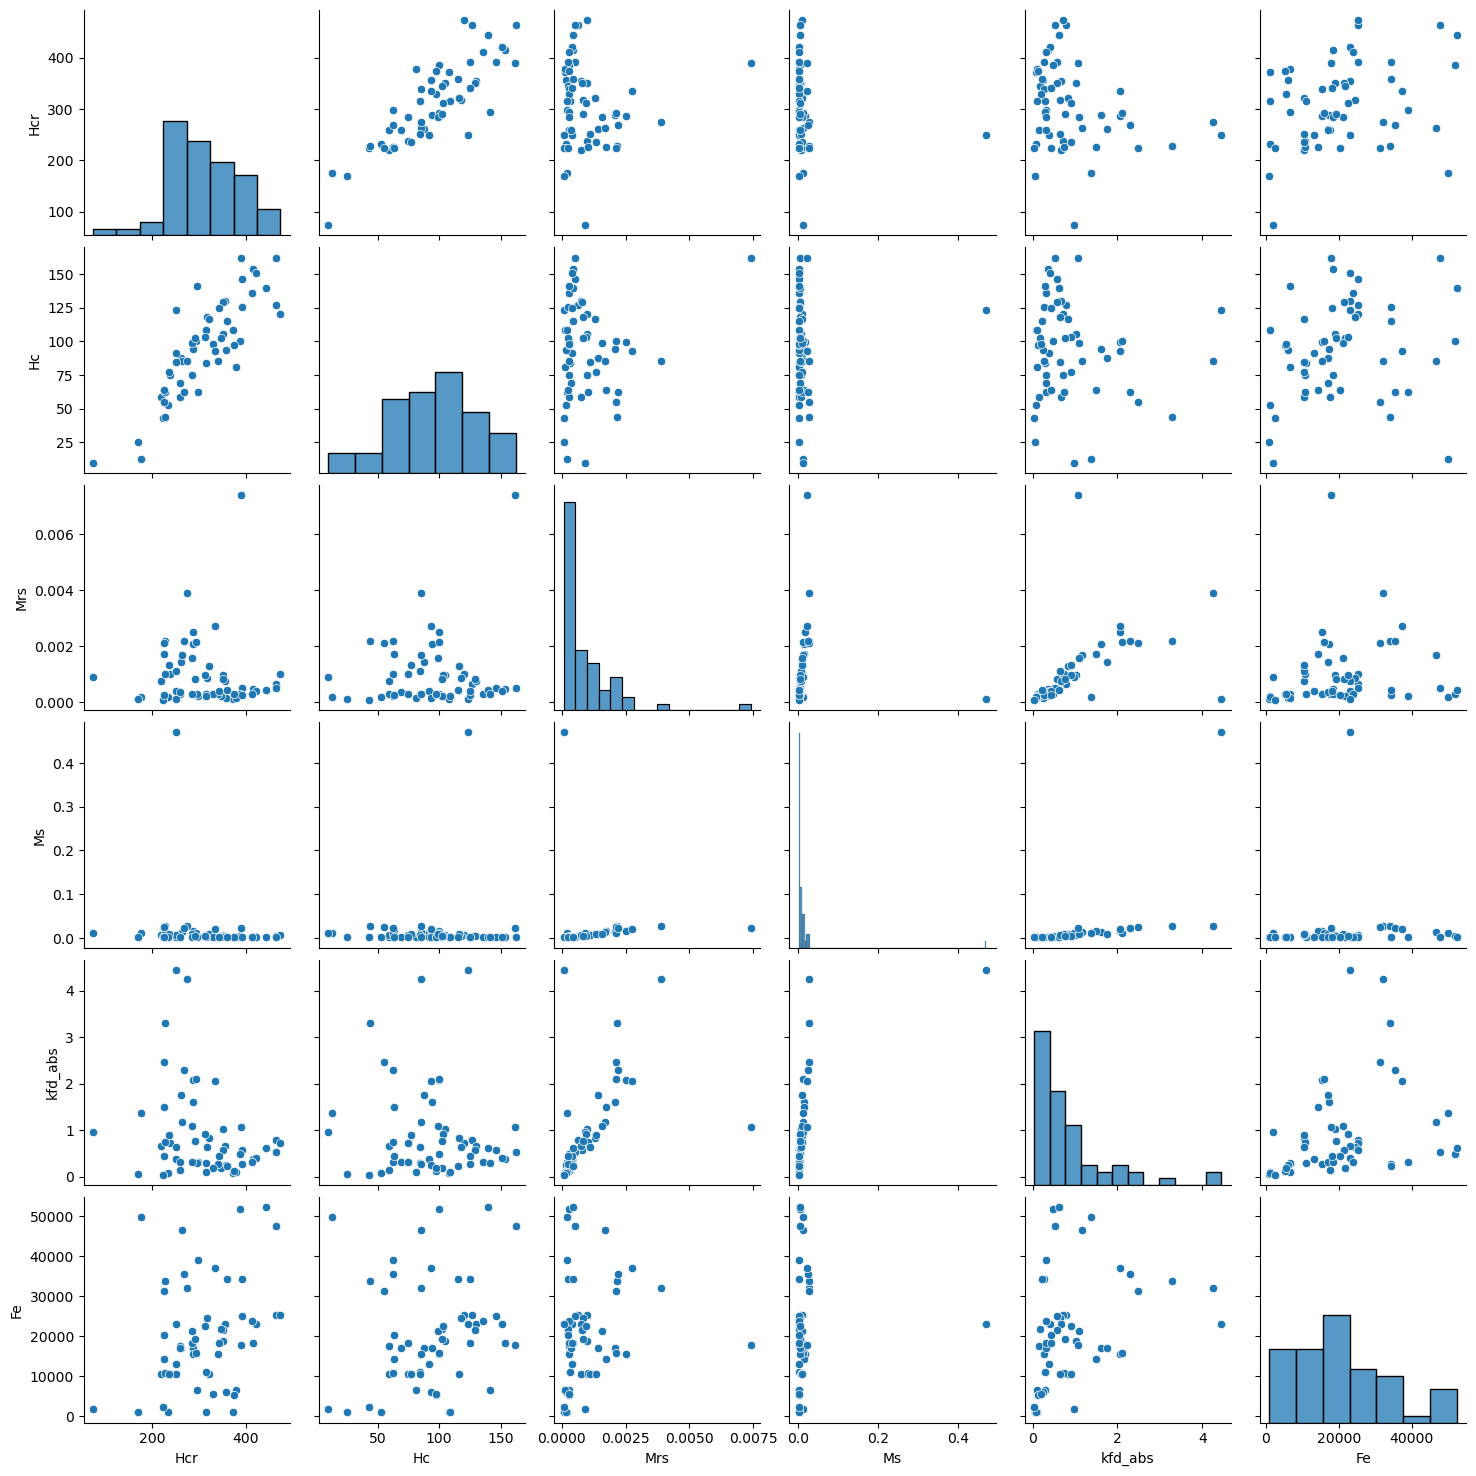

In [9]:
sns.pairplot(dm.loc[:,['Hcr', 'Hc', 'Mrs', 'Ms', 'kfd_abs', 'Fe']])

[  9.828    11.35283  12.87766  14.40249  15.92732  17.45215  18.97698
  20.50181  22.02664  23.55147  25.0763   26.60113  28.12596  29.65079
  31.17562  32.70045  34.22528  35.75011  37.27494  38.79977  40.3246
  41.84943  43.37426  44.89909  46.42392  47.94875  49.47358  50.99841
  52.52324  54.04807  55.5729   57.09773  58.62256  60.14739  61.67222
  63.19705  64.72188  66.24671  67.77154  69.29637  70.8212   72.34603
  73.87086  75.39569  76.92052  78.44535  79.97018  81.49501  83.01984
  84.54467  86.0695   87.59433  89.11916  90.64399  92.16882  93.69365
  95.21848  96.74331  98.26814  99.79297 101.3178  102.84263 104.36746
 105.89229 107.41712 108.94195 110.46678 111.99161 113.51644 115.04127
 116.5661  118.09093 119.61576 121.14059 122.66542 124.19025 125.71508
 127.23991 128.76474 130.28957 131.8144  133.33923 134.86406 136.38889
 137.91372 139.43855 140.96338 142.48821 144.01304 145.53787 147.0627
 148.58753 150.11236 151.63719 153.16202 154.68685 156.21168 157.73651
 159.261

NameError: name 'graphsf' is not defined

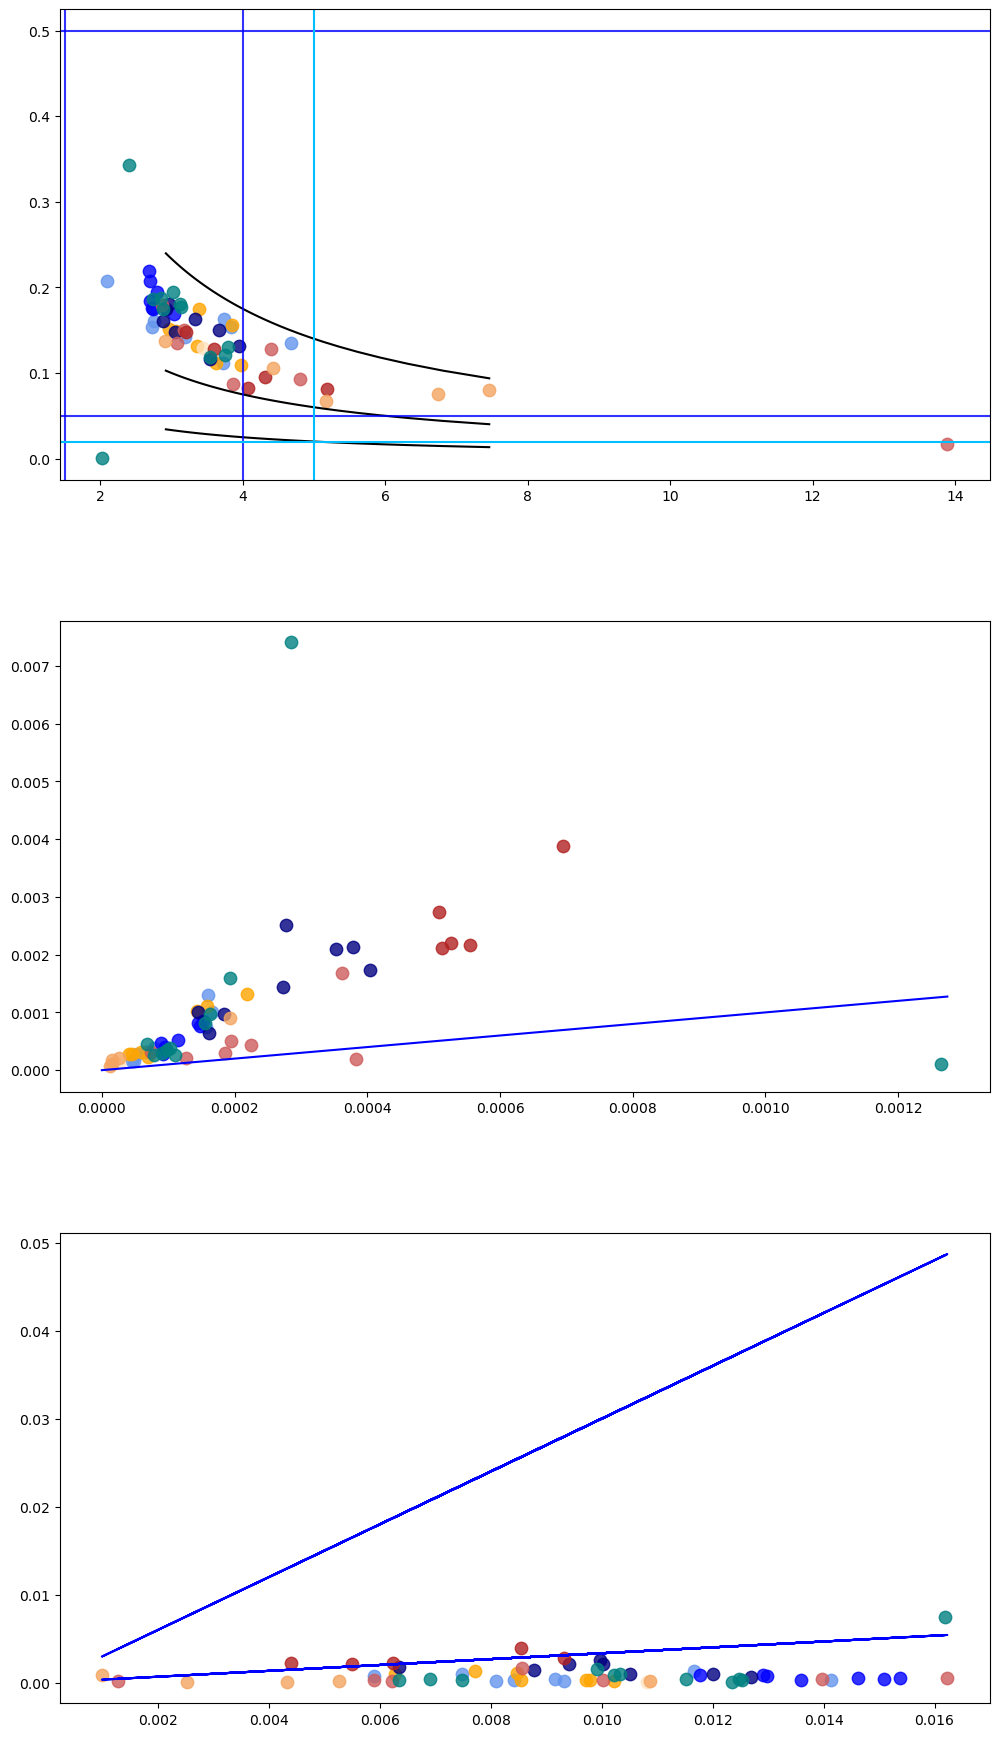

In [11]:
#import graphsf
fig, ((rx1, rx2, rx3)) = plt.subplots(3, 1,  figsize=(12, 22))
fig.subplots_adjust(hspace=0.3)

sHc  = np.arange(min(dm.Hc), max(dm.Hc), (max(dm.Hc)- min(dm.Hc))/100)
sHcr = np.arange(min(dm.Hcr), max(dm.Hcr), (max(dm.Hcr)- min(dm.Hcr))/100)

ss = 80
aa = 0.8

print(sHc)
p01 = 0.1/(sHcr/sHc)
p03 = 0.3/(sHcr/sHc)
p025 = 0.25/(sHcr/sHc)
p07 = 0.7/(sHcr/sHc)

rx1.scatter(dm.Hcr[dm['SAMPLE'].str.startswith("P")]/dm.Hc[dm['SAMPLE'].str.startswith("P")], dm.Mrs[dm['SAMPLE'].str.startswith("P")]/dm.Ms[dm['SAMPLE'].str.startswith("P")],  alpha = aa, s=ss, c= "cornflowerblue", label = 'P Site')
rx1.scatter(dm.Hcr[dm['SAMPLE'].str.startswith("S")]/dm.Hc[dm['SAMPLE'].str.startswith("S")], dm.Mrs[dm['SAMPLE'].str.startswith("S")]/dm.Ms[dm['SAMPLE'].str.startswith("S")],   alpha = aa, s=ss, c = "orange", label = 'S Site')
rx1.scatter(dm.Hcr[dm['SAMPLE'].str.startswith("E")]/dm.Hc[dm['SAMPLE'].str.startswith("E")], dm.Mrs[dm['SAMPLE'].str.startswith("E")]/dm.Ms[dm['SAMPLE'].str.startswith("E")],  alpha = aa, s=ss,  c = "blue", label = 'E Site')
rx1.scatter(dm.Hcr[dm['SAMPLE'].str.startswith("A")]/dm.Hc[dm['SAMPLE'].str.startswith("A")], dm.Mrs[dm['SAMPLE'].str.startswith("A")]/dm.Ms[dm['SAMPLE'].str.startswith("A")],  alpha = aa, s=ss,  c = "navy", label = 'A Site')
rx1.scatter(dm.Hcr[dm['SAMPLE'].str.startswith("HE")]/dm.Hc[dm['SAMPLE'].str.startswith("HE")], dm.Mrs[dm['SAMPLE'].str.startswith("HE")]/dm.Ms[dm['SAMPLE'].str.startswith("HE")],  alpha = aa, s=ss,  c = "indianred", label = 'HE Site')

rx1.scatter(dm.Hcr[dm['SAMPLE'].str.startswith("L")]/dm.Hc[dm['SAMPLE'].str.startswith("L")], dm.Mrs[dm['SAMPLE'].str.startswith("L")]/dm.Ms[dm['SAMPLE'].str.startswith("L")],  alpha = aa, s=ss,  c = "bisque", label = 'L Site')
rx1.scatter(dm.Hcr[dm['SAMPLE'].str.startswith("D")]/dm.Hc[dm['SAMPLE'].str.startswith("D")], dm.Mrs[dm['SAMPLE'].str.startswith("D")]/dm.Ms[dm['SAMPLE'].str.startswith("D")],  alpha = aa, s=ss,  c = "firebrick", label = 'Dren Site')
rx1.scatter(dm.Hcr[dm['SAMPLE'].str.startswith("V")]/dm.Hc[dm['SAMPLE'].str.startswith("V")], dm.Mrs[dm['SAMPLE'].str.startswith("V")]/dm.Ms[dm['SAMPLE'].str.startswith("V")],   alpha = aa, s=ss, c = "sandybrown", label = 'Valthe Site')
rx1.scatter(dm.Hcr[dm['SAMPLE'].str.startswith("HOEKE")]/dm.Hc[dm['SAMPLE'].str.startswith("HOEKE")], dm.Mrs[dm['SAMPLE'].str.startswith("HOEKE")]/dm.Ms[dm['SAMPLE'].str.startswith("HOEKE")],   alpha = aa, s=ss, c = "teal", label = 'Hoeke Site')

rx1.plot(sHcr/sHc, p01, c="black", label = "p01")
rx1.plot(sHcr/sHc, p03, c="black", label = "p03")
rx1.plot(sHcr/sHc, p07, c="black", label = "p07")

rx1.axvline(x = 1.5, alpha = aa, color = 'b')
rx1.axvline(x = 4, alpha = aa, color = 'b')
rx1.axhline(y = 0.5, alpha = aa, color = 'b')
rx1.axhline(y = 0.05, alpha = aa, color = 'b')

rx1.axvline(x = 5, color = 'deepskyblue')
rx1.axhline(y = 0.02, color = 'deepskyblue')

rx2.scatter(dm.Kre_F1[dm['SAMPLE'].str.startswith("P")], dm.Mrs[dm['SAMPLE'].str.startswith("P")], alpha = aa, s=ss,  c= "cornflowerblue", label = 'P Site')
rx2.scatter(dm.Kre_F1[dm['SAMPLE'].str.startswith("S")], dm.Mrs[dm['SAMPLE'].str.startswith("S")], alpha = aa, s=ss,  c = "orange", label = 'S Site')
rx2.scatter(dm.Kre_F1[dm['SAMPLE'].str.startswith("E")], dm.Mrs[dm['SAMPLE'].str.startswith("E")], alpha = aa, s=ss,  c = "blue", label = 'E Site')
rx2.scatter(dm.Kre_F1[dm['SAMPLE'].str.startswith("A")], dm.Mrs[dm['SAMPLE'].str.startswith("A")], alpha = aa, s=ss,  c = "navy", label = 'A Site')
rx2.scatter(dm.Kre_F1[dm['SAMPLE'].str.startswith("HE")], dm.Mrs[dm['SAMPLE'].str.startswith("HE")], alpha = aa, s=ss,  c = "indianred", label = 'HE Site')

rx2.scatter(dm.Kre_F1[dm['SAMPLE'].str.startswith("L")], dm.Mrs[dm['SAMPLE'].str.startswith("L")], alpha = aa, s=ss,  c = "bisque", label = 'L Site')
rx2.scatter(dm.Kre_F1[dm['SAMPLE'].str.startswith("D")], dm.Mrs[dm['SAMPLE'].str.startswith("D")], alpha = aa, s=ss,  c = "firebrick", label = 'Dren Site')
rx2.scatter(dm.Kre_F1[dm['SAMPLE'].str.startswith("V")], dm.Mrs[dm['SAMPLE'].str.startswith("V")], alpha = aa, s=ss,  c = "sandybrown", label = 'Valthe Site')
rx2.scatter(dm.Kre_F1[dm['SAMPLE'].str.startswith("HOEKE")], dm.Mrs[dm['SAMPLE'].str.startswith("HOEKE")], alpha = aa, s=ss,  c = "teal", label = 'Hoeke Site')

rx2.plot(np.arange(0, 0.0013, 0.0013/50), np.arange(0, 0.0013, 0.0013/50),  c = 'b')


rx3.scatter(dm.Hc_T[dm['SAMPLE'].str.startswith("P")], dm.Mrs[dm['SAMPLE'].str.startswith("P")].abs(), alpha = aa, s=ss,  c= "cornflowerblue", label = 'P Site')
rx3.scatter(dm.Hc_T[dm['SAMPLE'].str.startswith("S")], dm.Mrs[dm['SAMPLE'].str.startswith("S")].abs(), alpha = aa, s=ss,  c = "orange", label = 'S Site')
rx3.scatter(dm.Hc_T[dm['SAMPLE'].str.startswith("E")], dm.Mrs[dm['SAMPLE'].str.startswith("E")].abs(), alpha = aa, s=ss,  c = "blue", label = 'E Site')
rx3.scatter(dm.Hc_T[dm['SAMPLE'].str.startswith("A")], dm.Mrs[dm['SAMPLE'].str.startswith("A")].abs(), alpha = aa, s=ss,  c = "navy", label = 'A Site')
rx3.scatter(dm.Hc_T[dm['SAMPLE'].str.startswith("HE")], dm.Mrs[dm['SAMPLE'].str.startswith("HE")].abs(), alpha = aa, s=ss,  c = "indianred", label = 'HE Site')

rx3.scatter(dm.Hc_T[dm['SAMPLE'].str.startswith("L")], dm.Mrs[dm['SAMPLE'].str.startswith("L")].abs(), alpha = aa, s=ss,  c = "bisque", label = 'L Site')
rx3.scatter(dm.Hc_T[dm['SAMPLE'].str.startswith("D")], dm.Mrs[dm['SAMPLE'].str.startswith("D")].abs(), alpha = aa, s=ss,  c = "firebrick", label = 'Dren Site')
rx3.scatter(dm.Hc_T[dm['SAMPLE'].str.startswith("V")], dm.Mrs[dm['SAMPLE'].str.startswith("V")].abs(), alpha = aa, s=ss,  c = "sandybrown", label = 'Valthe Site')
rx3.scatter(dm.Hc_T[dm['SAMPLE'].str.startswith("HOEKE")], dm.Mrs[dm['SAMPLE'].str.startswith("HOEKE")].abs(), alpha = aa, s=ss,  c = "teal", label = 'Hoeke Site')

rx3.plot(dm.Hc_T, dm.Hc_T*3, c = 'b')
rx3.plot(dm.Hc_T, dm.Hc_T/3, c = 'b')


graphsf.ratios(rx1, rx2, rx3, plt)

Text(0.5, 1.0, ' F1 im')

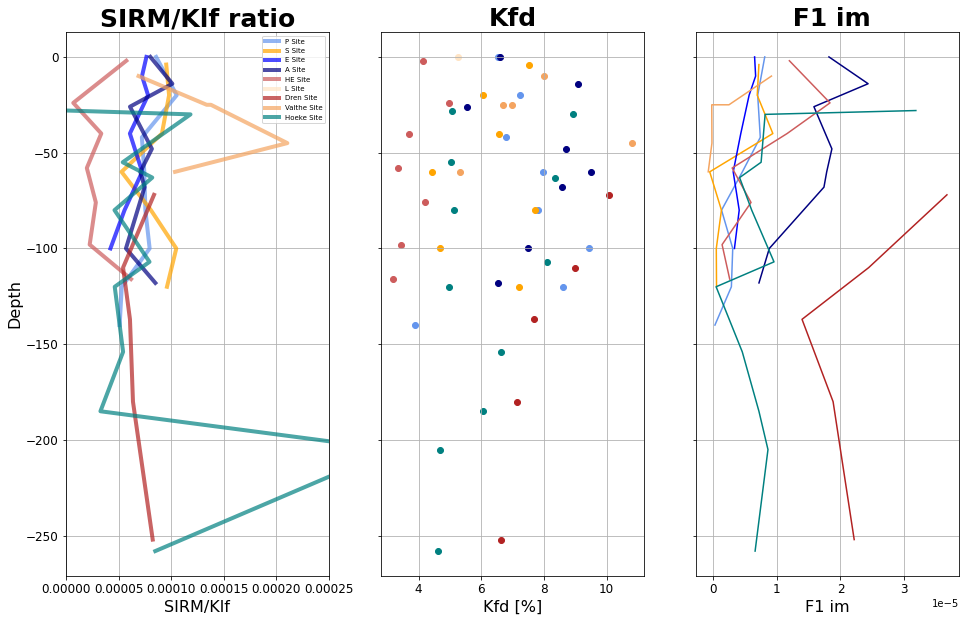

In [ ]:
import graphsf
fig, ((xc1, xc2, xc3)) = plt.subplots(1, 3, sharey=True, figsize=(16, 10))
a=0.7
lw=4
xc1.plot(dm.SIRM_F1mass[dm['SAMPLE'].str.startswith("P")], -dm.Depth[dm['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
xc1.plot(dm.SIRM_F1mass[dm['SAMPLE'].str.startswith("S")], -dm.Depth[dm['SAMPLE'].str.startswith("S")], alpha=a,linewidth=lw, c = "orange", label = 'S Site')
xc1.plot(dm.SIRM_F1mass[dm['SAMPLE'].str.startswith("E")], -dm.Depth[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
xc1.plot(dm.SIRM_F1mass[dm['SAMPLE'].str.startswith("A")], -dm.Depth[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
xc1.plot(dm.SIRM_F1mass[dm['SAMPLE'].str.startswith("HE")], -dm.Depth[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
xc1.plot(dm.SIRM_F1mass[dm['SAMPLE'].str.startswith("L")], -dm.Depth[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
xc1.plot(dm.SIRM_F1mass[dm['SAMPLE'].str.startswith("D")], -dm.Depth[dm['SAMPLE'].str.startswith("D")],  alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
xc1.plot(dm.SIRM_F1mass[dm['SAMPLE'].str.startswith("V")], -dm.Depth[dm['SAMPLE'].str.startswith("V")],  alpha=a,linewidth=lw,c = "sandybrown", label = 'Valthe Site')
xc1.plot(dm.SIRM_F1mass[dm['SAMPLE'].str.startswith("HOEKE")], -dm.Depth[dm['SAMPLE'].str.startswith("HOEKE")],  alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')

xc2.scatter(dm.kfd[dm['SAMPLE'].str.startswith("P")], -dm.Depth[dm['SAMPLE'].str.startswith("P")],  c = "cornflowerblue", label = 'P Site')
xc2.scatter(dm.kfd[dm['SAMPLE'].str.startswith("S")], -dm.Depth[dm['SAMPLE'].str.startswith("S")],  c = "orange", label = 'S Site')
#xc2.scatter(dm.kfd[dm['SAMPLE'].str.startswith("E0")&('E1')], -dm.Depth[dm['SAMPLE'].str.startswith("E")&('E1')],  c = "blue", label = 'E Site' )
xc2.scatter(dm.kfd[dm['SAMPLE'].str.startswith("A")], -dm.Depth[dm['SAMPLE'].str.startswith("A")], c = "navy", label = 'A Site')
xc2.scatter(dm.kfd[dm['SAMPLE'].str.startswith("HE")], -dm.Depth[dm['SAMPLE'].str.startswith("HE")], c = "indianred", label = 'HE Site')
xc2.scatter(dm.kfd[dm['SAMPLE'].str.startswith("L")], -dm.Depth[dm['SAMPLE'].str.startswith("L")], c = "bisque", label = 'L Site')
xc2.scatter(dm.kfd[dm['SAMPLE'].str.startswith("D")], -dm.Depth[dm['SAMPLE'].str.startswith("D")],  c = "firebrick", label = 'Dren Site')
xc2.scatter(dm.kfd[dm['SAMPLE'].str.startswith("V")], -dm.Depth[dm['SAMPLE'].str.startswith("V")],  c = "sandybrown", label = 'Valthe Site')
xc2.scatter(dm.kfd[dm['SAMPLE'].str.startswith("HOEKE")], -dm.Depth[dm['SAMPLE'].str.startswith("HOEKE")],  c = "teal", label = 'Hoeke Site')

xc3.plot(dm.Kim_F1[dm['SAMPLE'].str.startswith("P")], -dm.Depth[dm['SAMPLE'].str.startswith("P")],  c = "cornflowerblue", label = 'P Site')
xc3.plot(dm.Kim_F1[dm['SAMPLE'].str.startswith("S")], -dm.Depth[dm['SAMPLE'].str.startswith("S")],  c = "orange", label = 'S Site')
xc3.plot(dm.Kim_F1[dm['SAMPLE'].str.startswith("E")], -dm.Depth[dm['SAMPLE'].str.startswith("E")],  c = "blue", label = 'E Site' )
xc3.plot(dm.Kim_F1[dm['SAMPLE'].str.startswith("A")], -dm.Depth[dm['SAMPLE'].str.startswith("A")], c = "navy", label = 'A Site')
xc3.plot(dm.Kim_F1[dm['SAMPLE'].str.startswith("HE")], -dm.Depth[dm['SAMPLE'].str.startswith("HE")], c = "indianred", label = 'HE Site')
xc3.plot(dm.Kim_F1[dm['SAMPLE'].str.startswith("L")], -dm.Depth[dm['SAMPLE'].str.startswith("L")], c = "bisque", label = 'L Site')
xc3.plot(dm.Kim_F1[dm['SAMPLE'].str.startswith("D")], -dm.Depth[dm['SAMPLE'].str.startswith("D")],  c = "firebrick", label = 'Dren Site')
xc3.plot(dm.Kim_F1[dm['SAMPLE'].str.startswith("V")], -dm.Depth[dm['SAMPLE'].str.startswith("V")],  c = "sandybrown", label = 'Valthe Site')
xc3.plot(dm.Kim_F1[dm['SAMPLE'].str.startswith("HOEKE")], -dm.Depth[dm['SAMPLE'].str.startswith("HOEKE")],  c = "teal", label = 'Hoeke Site')

graphsf.prof(xc1, xc2, xc3, plt)

xc1.set_title("SIRM/Klf ratio" , fontweight='bold', fontsize=25) 
xc1.set_ylabel('Depth', fontsize = 16) 
xc1.set_xlabel('SIRM/Klf', fontsize = 16) 
xc1.legend(loc='upper right', fontsize = 7)
xc1.set_xlim(0, 0.00025) 

xc2.set_title("Kfd" , fontweight='bold', fontsize=25) 
xc2.set_xlabel('Kfd [%]', fontsize = 16) 

xc3.set_xlabel("F1 im" , fontsize = 16) 
xc3.set_title(" F1 im" , fontweight='bold', fontsize=25) 

(-0.001, 25.0)

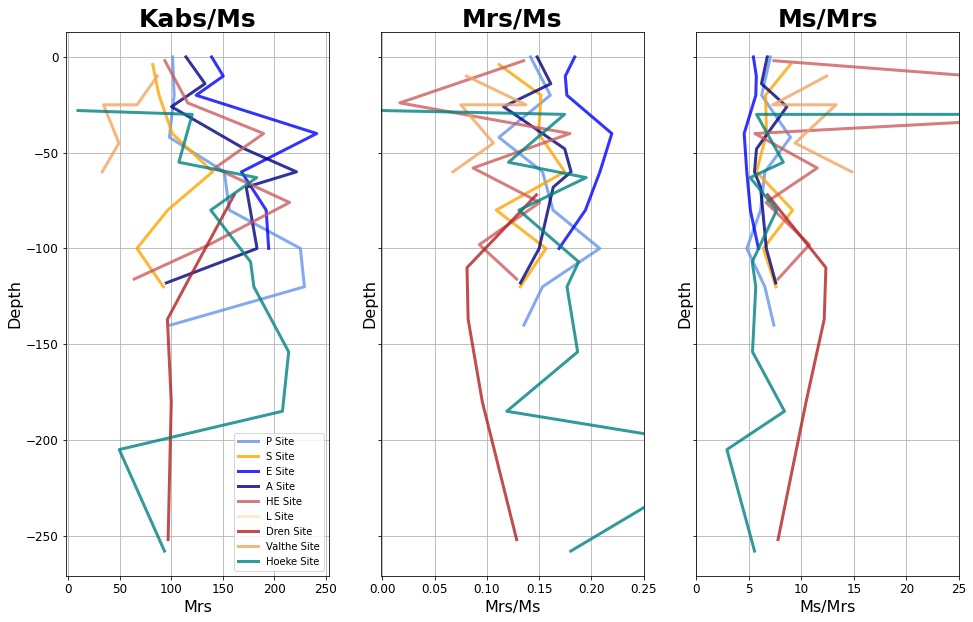

In [ ]:
import graphsf
fig, ((xc1, xc2, xc3)) = plt.subplots(1, 3, sharey=True, figsize=(16, 10))

lw =3
a = 0.8

xc1.plot(dm.kfd_abs[dm['SAMPLE'].str.startswith("P")]/dm.Ms[dm['SAMPLE'].str.startswith("P")], -dm.Depth[dm['SAMPLE'].str.startswith("P")],  alpha=a,linewidth=lw,c = "cornflowerblue", label = 'P Site')
xc1.plot(dm.kfd_abs[dm['SAMPLE'].str.startswith("S")]/dm.Ms[dm['SAMPLE'].str.startswith("S")], -dm.Depth[dm['SAMPLE'].str.startswith("S")],  alpha=a,linewidth=lw,c = "orange", label = 'S Site')
xc1.plot(dm.kfd_abs[dm['SAMPLE'].str.startswith("E")]/dm.Ms[dm['SAMPLE'].str.startswith("E")], -dm.Depth[dm['SAMPLE'].str.startswith("E")],  alpha=a,linewidth=lw,c = "blue", label = 'E Site' )
xc1.plot(dm.kfd_abs[dm['SAMPLE'].str.startswith("A")]/dm.Ms[dm['SAMPLE'].str.startswith("A")], -dm.Depth[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
xc1.plot(dm.kfd_abs[dm['SAMPLE'].str.startswith("HE")]/dm.Ms[dm['SAMPLE'].str.startswith("HE")], -dm.Depth[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
xc1.plot(dm.kfd_abs[dm['SAMPLE'].str.startswith("L")]/dm.Ms[dm['SAMPLE'].str.startswith("L")], -dm.Depth[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
xc1.plot(dm.kfd_abs[dm['SAMPLE'].str.startswith("D")]/dm.Ms[dm['SAMPLE'].str.startswith("D")], -dm.Depth[dm['SAMPLE'].str.startswith("D")],  alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
xc1.plot(dm.kfd_abs[dm['SAMPLE'].str.startswith("V")]/dm.Ms[dm['SAMPLE'].str.startswith("V")], -dm.Depth[dm['SAMPLE'].str.startswith("V")], alpha=a, linewidth=lw,c = "sandybrown", label = 'Valthe Site')
xc1.plot(dm.kfd_abs[dm['SAMPLE'].str.startswith("HOEKE")]/dm.Ms[dm['SAMPLE'].str.startswith("HOEKE")], -dm.Depth[dm['SAMPLE'].str.startswith("HOEKE")],alpha=a,  linewidth=lw,c = "teal", label = 'Hoeke Site')

xc2.plot(dm.Mrs[dm['SAMPLE'].str.startswith("P")]/dm.Ms[dm['SAMPLE'].str.startswith("P")], -dm.Depth[dm['SAMPLE'].str.startswith("P")],  alpha=a,linewidth=lw,c = "cornflowerblue", label = 'P Site')
xc2.plot(dm.Mrs[dm['SAMPLE'].str.startswith("S")]/dm.Ms[dm['SAMPLE'].str.startswith("S")], -dm.Depth[dm['SAMPLE'].str.startswith("S")],  alpha=a,linewidth=lw,c = "orange", label = 'S Site')
xc2.plot(dm.Mrs[dm['SAMPLE'].str.startswith("E")]/dm.Ms[dm['SAMPLE'].str.startswith("E")], -dm.Depth[dm['SAMPLE'].str.startswith("E")],  alpha=a,linewidth=lw,c = "blue", label = 'E Site' )
xc2.plot(dm.Mrs[dm['SAMPLE'].str.startswith("A")]/dm.Ms[dm['SAMPLE'].str.startswith("A")], -dm.Depth[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
xc2.plot(dm.Mrs[dm['SAMPLE'].str.startswith("HE")]/dm.Ms[dm['SAMPLE'].str.startswith("HE")], -dm.Depth[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
xc2.plot(dm.Mrs[dm['SAMPLE'].str.startswith("L")]/dm.Ms[dm['SAMPLE'].str.startswith("L")], -dm.Depth[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
xc2.plot(dm.Mrs[dm['SAMPLE'].str.startswith("D")]/dm.Ms[dm['SAMPLE'].str.startswith("D")], -dm.Depth[dm['SAMPLE'].str.startswith("D")],  alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
xc2.plot(dm.Mrs[dm['SAMPLE'].str.startswith("V")]/dm.Ms[dm['SAMPLE'].str.startswith("V")], -dm.Depth[dm['SAMPLE'].str.startswith("V")], alpha=a, linewidth=lw,c = "sandybrown", label = 'Valthe Site')
xc2.plot(dm.Mrs[dm['SAMPLE'].str.startswith("HOEKE")]/dm.Ms[dm['SAMPLE'].str.startswith("HOEKE")], -dm.Depth[dm['SAMPLE'].str.startswith("HOEKE")],alpha=a,  linewidth=lw,c = "teal", label = 'Hoeke Site')

xc3.plot(dm.Ms[dm['SAMPLE'].str.startswith("P")]/dm.Mrs[dm['SAMPLE'].str.startswith("P")], -dm.Depth[dm['SAMPLE'].str.startswith("P")],  alpha=a,linewidth=lw,c = "cornflowerblue", label = 'P Site')
xc3.plot(dm.Ms[dm['SAMPLE'].str.startswith("S")]/dm.Mrs[dm['SAMPLE'].str.startswith("S")], -dm.Depth[dm['SAMPLE'].str.startswith("S")],  alpha=a,linewidth=lw,c = "orange", label = 'S Site')
xc3.plot(dm.Ms[dm['SAMPLE'].str.startswith("E")]/dm.Mrs[dm['SAMPLE'].str.startswith("E")], -dm.Depth[dm['SAMPLE'].str.startswith("E")],  alpha=a,linewidth=lw,c = "blue", label = 'E Site' )
xc3.plot(dm.Ms[dm['SAMPLE'].str.startswith("A")]/dm.Mrs[dm['SAMPLE'].str.startswith("A")], -dm.Depth[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
xc3.plot(dm.Ms[dm['SAMPLE'].str.startswith("HE")]/dm.Mrs[dm['SAMPLE'].str.startswith("HE")], -dm.Depth[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
xc3.plot(dm.Ms[dm['SAMPLE'].str.startswith("L")]/dm.Mrs[dm['SAMPLE'].str.startswith("L")], -dm.Depth[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
xc3.plot(dm.Ms[dm['SAMPLE'].str.startswith("D")]/dm.Mrs[dm['SAMPLE'].str.startswith("D")], -dm.Depth[dm['SAMPLE'].str.startswith("D")],  alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
xc3.plot(dm.Ms[dm['SAMPLE'].str.startswith("V")]/dm.Mrs[dm['SAMPLE'].str.startswith("V")], -dm.Depth[dm['SAMPLE'].str.startswith("V")], alpha=a, linewidth=lw,c = "sandybrown", label = 'Valthe Site')
xc3.plot(dm.Ms[dm['SAMPLE'].str.startswith("HOEKE")]/dm.Mrs[dm['SAMPLE'].str.startswith("HOEKE")], -dm.Depth[dm['SAMPLE'].str.startswith("HOEKE")],alpha=a,  linewidth=lw,c = "teal", label = 'Hoeke Site')

graphsf.prof(xc1, xc2, xc3, plt)

xc1.set_title("Kabs/Ms" , fontweight='bold', fontsize=25) 
xc1.set_ylabel('Depth', fontsize = 16) 
xc1.set_xlabel('Mrs', fontsize = 16) 
xc1.legend(loc='lower right', fontsize = 10)

xc2.set_title("Mrs/Ms" , fontweight='bold', fontsize=25) 
xc2.set_ylabel('Depth', fontsize = 16) 
xc2.set_xlabel('Mrs/Ms', fontsize = 16) 
#xc2.legend(loc='upper right', fontsize = 7)
xc2.set_xlim(-0.001, 0.25) 

xc3.set_title("Ms/Mrs" , fontweight='bold', fontsize=25) 
xc3.set_ylabel('Depth', fontsize = 16) 
xc3.set_xlabel('Ms/Mrs', fontsize = 16) 
#xc3.legend(loc='upper right', fontsize = 7)
xc3.set_xlim(-0.001, 25) 

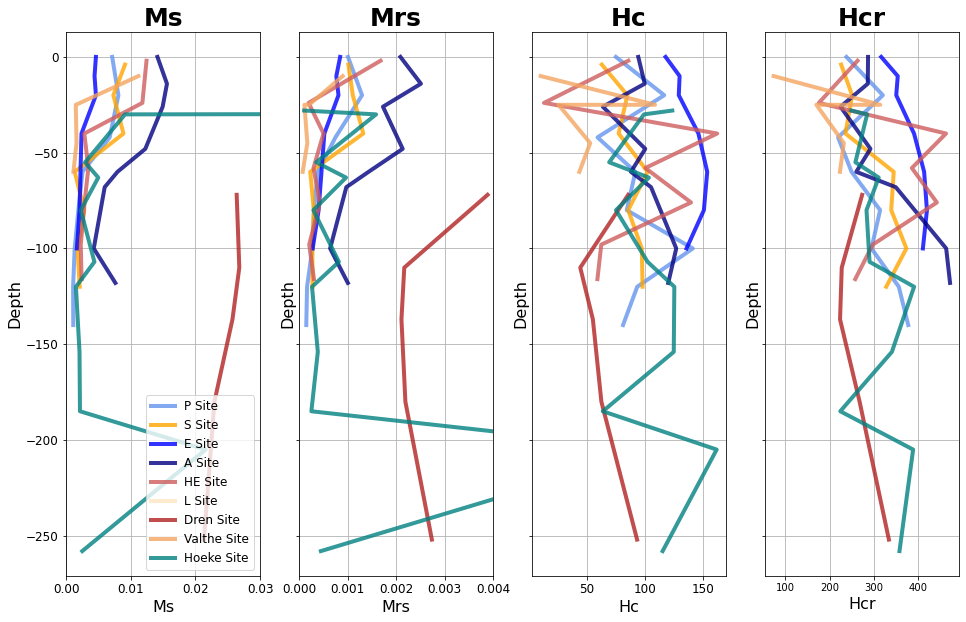

In [ ]:
import graphsf
fig, ((xc1, xc2, xc3, xc4)) = plt.subplots(1, 4, sharey=True, figsize=(16, 10))

lw =4
a = 0.8

xc1.plot(dm.Ms[dm['SAMPLE'].str.startswith("P")], -dm.Depth[dm['SAMPLE'].str.startswith("P")],  alpha=a,linewidth=lw,c = "cornflowerblue", label = 'P Site')
xc1.plot(dm.Ms[dm['SAMPLE'].str.startswith("S")], -dm.Depth[dm['SAMPLE'].str.startswith("S")],  alpha=a,linewidth=lw,c = "orange", label = 'S Site')
xc1.plot(dm.Ms[dm['SAMPLE'].str.startswith("E")], -dm.Depth[dm['SAMPLE'].str.startswith("E")],  alpha=a,linewidth=lw,c = "blue", label = 'E Site' )
xc1.plot(dm.Ms[dm['SAMPLE'].str.startswith("A")], -dm.Depth[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
xc1.plot(dm.Ms[dm['SAMPLE'].str.startswith("HE")], -dm.Depth[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
xc1.plot(dm.Ms[dm['SAMPLE'].str.startswith("L")], -dm.Depth[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
xc1.plot(dm.Ms[dm['SAMPLE'].str.startswith("D")], -dm.Depth[dm['SAMPLE'].str.startswith("D")],  alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
xc1.plot(dm.Ms[dm['SAMPLE'].str.startswith("V")], -dm.Depth[dm['SAMPLE'].str.startswith("V")], alpha=a, linewidth=lw,c = "sandybrown", label = 'Valthe Site')
xc1.plot(dm.Ms[dm['SAMPLE'].str.startswith("HOEKE")], -dm.Depth[dm['SAMPLE'].str.startswith("HOEKE")],alpha=a,  linewidth=lw,c = "teal", label = 'Hoeke Site')


xc2.plot(dm.Mrs[dm['SAMPLE'].str.startswith("P")], -dm.Depth[dm['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
xc2.plot(dm.Mrs[dm['SAMPLE'].str.startswith("S")], -dm.Depth[dm['SAMPLE'].str.startswith("S")], alpha=a,linewidth=lw, c = "orange", label = 'S Site')
xc2.plot(dm.Mrs[dm['SAMPLE'].str.startswith("E")], -dm.Depth[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
xc2.plot(dm.Mrs[dm['SAMPLE'].str.startswith("A")], -dm.Depth[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
xc2.plot(dm.Mrs[dm['SAMPLE'].str.startswith("HE")], -dm.Depth[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
xc2.plot(dm.Mrs[dm['SAMPLE'].str.startswith("L")], -dm.Depth[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
xc2.plot(dm.Mrs[dm['SAMPLE'].str.startswith("D")], -dm.Depth[dm['SAMPLE'].str.startswith("D")],  alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
xc2.plot(dm.Mrs[dm['SAMPLE'].str.startswith("V")], -dm.Depth[dm['SAMPLE'].str.startswith("V")],  alpha=a,linewidth=lw,c = "sandybrown", label = 'Valthe Site')
xc2.plot(dm.Mrs[dm['SAMPLE'].str.startswith("HOEKE")], -dm.Depth[dm['SAMPLE'].str.startswith("HOEKE")],  alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')

xc3.plot(dm.Hc[dm['SAMPLE'].str.startswith("P")], -dm.Depth[dm['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
xc3.plot(dm.Hc[dm['SAMPLE'].str.startswith("S")], -dm.Depth[dm['SAMPLE'].str.startswith("S")], alpha=a,linewidth=lw, c = "orange", label = 'S Site')
xc3.plot(dm.Hc[dm['SAMPLE'].str.startswith("E")], -dm.Depth[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
xc3.plot(dm.Hc[dm['SAMPLE'].str.startswith("A")], -dm.Depth[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
xc3.plot(dm.Hc[dm['SAMPLE'].str.startswith("HE")], -dm.Depth[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
xc3.plot(dm.Hc[dm['SAMPLE'].str.startswith("L")], -dm.Depth[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
xc3.plot(dm.Hc[dm['SAMPLE'].str.startswith("D")], -dm.Depth[dm['SAMPLE'].str.startswith("D")],  alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
xc3.plot(dm.Hc[dm['SAMPLE'].str.startswith("V")], -dm.Depth[dm['SAMPLE'].str.startswith("V")],  alpha=a,linewidth=lw,c = "sandybrown", label = 'Valthe Site')
xc3.plot(dm.Hc[dm['SAMPLE'].str.startswith("HOEKE")], -dm.Depth[dm['SAMPLE'].str.startswith("HOEKE")],  alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')

xc4.plot(dm.Hcr[dm['SAMPLE'].str.startswith("P")], -dm.Depth[dm['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
xc4.plot(dm.Hcr[dm['SAMPLE'].str.startswith("S")], -dm.Depth[dm['SAMPLE'].str.startswith("S")], alpha=a,linewidth=lw, c = "orange", label = 'S Site')
xc4.plot(dm.Hcr[dm['SAMPLE'].str.startswith("E")], -dm.Depth[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
xc4.plot(dm.Hcr[dm['SAMPLE'].str.startswith("A")], -dm.Depth[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
xc4.plot(dm.Hcr[dm['SAMPLE'].str.startswith("HE")], -dm.Depth[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
xc4.plot(dm.Hcr[dm['SAMPLE'].str.startswith("L")], -dm.Depth[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
xc4.plot(dm.Hcr[dm['SAMPLE'].str.startswith("D")], -dm.Depth[dm['SAMPLE'].str.startswith("D")],  alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
xc4.plot(dm.Hcr[dm['SAMPLE'].str.startswith("V")], -dm.Depth[dm['SAMPLE'].str.startswith("V")],  alpha=a,linewidth=lw,c = "sandybrown", label = 'Valthe Site')
xc4.plot(dm.Hcr[dm['SAMPLE'].str.startswith("HOEKE")], -dm.Depth[dm['SAMPLE'].str.startswith("HOEKE")],  alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')

graphsf.prof(xc1, xc2, xc3, plt)

xc1.set_title("Ms" , fontweight='bold', fontsize=25) 
xc1.set_ylabel('Depth', fontsize = 16) 
xc1.set_xlabel('Ms', fontsize = 16) 
xc1.legend(loc='lower right', fontsize = 12)
xc1.set_xlim(0, 0.03) 

xc2.set_title("Mrs" , fontweight='bold', fontsize=25) 
xc2.set_ylabel('Depth', fontsize = 16) 
xc2.set_xlabel('Mrs', fontsize = 16) 
#xc2.legend(loc='lower right', fontsize = 12)
xc2.set_xlim(0, 0.004) 

xc3.set_title("Hc" , fontweight='bold', fontsize=25) 
xc3.set_ylabel('Depth', fontsize = 16) 
xc3.set_xlabel('Hc', fontsize = 16) 
#xc3.legend(loc='lower right', fontsize = 12)
#xc3.set_xlim(0, 0.004)

xc4.set_title("Hcr" , fontweight='bold', fontsize=25) 
xc4.set_ylabel('Depth', fontsize = 16) 
xc4.set_xlabel('Hcr', fontsize = 16) 
xc4.grid(True)
#xc4.legend(loc='lower right', fontsize = 12)
#xc4.set_xlim(0, 0.004) 

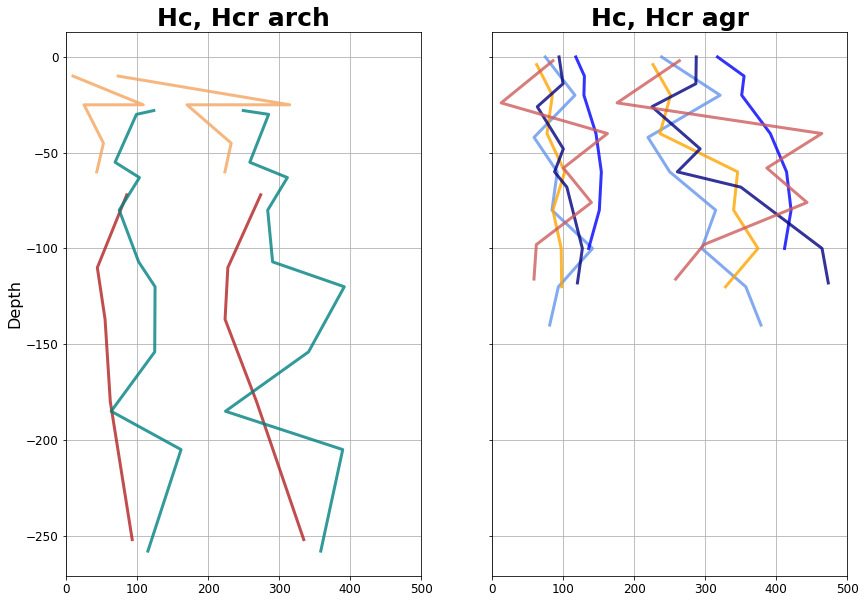

In [ ]:
import graphsf
fig, ((xc1, xc2)) = plt.subplots(1, 2, sharey=True, figsize=(14, 10))

lw = 3
xc1.plot(dm.Hc[dm['SAMPLE'].str.startswith("D")], -dm.Depth[dm['SAMPLE'].str.startswith("D")],alpha=a,linewidth=lw,  c = "firebrick", label = 'Dren Site')
xc1.plot(dm.Hc[dm['SAMPLE'].str.startswith("V")], -dm.Depth[dm['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw, c = "sandybrown", label = 'Valthe Site')
xc1.plot(dm.Hc[dm['SAMPLE'].str.startswith("HOEKE")], -dm.Depth[dm['SAMPLE'].str.startswith("HOEKE")], alpha=a,linewidth=lw, c = "teal", label = 'Hoeke Site')

xc1.plot(dm.Hcr[dm['SAMPLE'].str.startswith("D")], -dm.Depth[dm['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw, c = "firebrick", label = 'Dren Site')
xc1.plot(dm.Hcr[dm['SAMPLE'].str.startswith("V")], -dm.Depth[dm['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw, c = "sandybrown", label = 'Valthe Site')
xc1.plot(dm.Hcr[dm['SAMPLE'].str.startswith("HOEKE")], -dm.Depth[dm['SAMPLE'].str.startswith("HOEKE")], alpha=a,linewidth=lw, c = "teal", label = 'Hoeke Site')

xc2.plot(dm.Hc[dm['SAMPLE'].str.startswith("P")], -dm.Depth[dm['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
xc2.plot(dm.Hc[dm['SAMPLE'].str.startswith("S")], -dm.Depth[dm['SAMPLE'].str.startswith("S")],  alpha=a,linewidth=lw,c = "orange", label = 'S Site')
xc2.plot(dm.Hc[dm['SAMPLE'].str.startswith("E")], -dm.Depth[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
xc2.plot(dm.Hc[dm['SAMPLE'].str.startswith("A")], -dm.Depth[dm['SAMPLE'].str.startswith("A")],alpha=a,linewidth=lw, c = "navy", label = 'A Site')
xc2.plot(dm.Hc[dm['SAMPLE'].str.startswith("HE")], -dm.Depth[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
xc2.plot(dm.Hc[dm['SAMPLE'].str.startswith("L")], -dm.Depth[dm['SAMPLE'].str.startswith("L")],alpha=a,linewidth=lw, c = "bisque", label = 'L Site')

xc2.plot(dm.Hcr[dm['SAMPLE'].str.startswith("P")], -dm.Depth[dm['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
xc2.plot(dm.Hcr[dm['SAMPLE'].str.startswith("S")], -dm.Depth[dm['SAMPLE'].str.startswith("S")],  alpha=a,linewidth=lw,c = "orange", label = 'S Site')
xc2.plot(dm.Hcr[dm['SAMPLE'].str.startswith("E")], -dm.Depth[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
xc2.plot(dm.Hcr[dm['SAMPLE'].str.startswith("A")], -dm.Depth[dm['SAMPLE'].str.startswith("A")],alpha=a,linewidth=lw, c = "navy", label = 'A Site')
xc2.plot(dm.Hcr[dm['SAMPLE'].str.startswith("HE")], -dm.Depth[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
xc2.plot(dm.Hcr[dm['SAMPLE'].str.startswith("L")], -dm.Depth[dm['SAMPLE'].str.startswith("L")],alpha=a,linewidth=lw, c = "bisque", label = 'L Site')

xc1.set_xlim(0, 500) 
xc2.set_xlim(0, 500) 

graphsf.prof2(xc1, xc2, plt)

<ipython-input-15-44b6fc7507c6>:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sites, rotation=45)
<ipython-input-15-44b6fc7507c6>:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sites, rotation=45)
<ipython-input-15-44b6fc7507c6>:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(sites, rotation=45)
<ipython-input-15-44b6fc7507c6>:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(sites, rotation=45)
<ipython-input-15-44b6fc7507c6>:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(sites, rotation=45)
<ipython-input-15-44b6fc7507c6>:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax6.set_xticklabels(sites, rotation=45)
<ipython-input-15-44b6fc7507c6>:95: UserWarning: FixedFormatter should only be use

(0.0, 3.1)

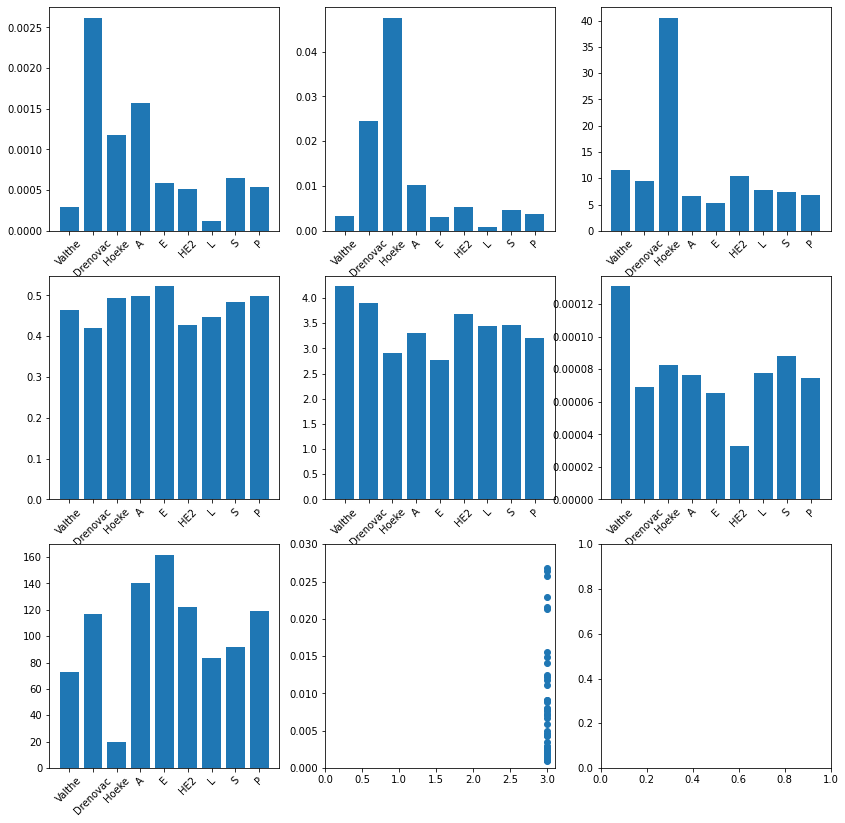

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(14, 14))

sites =  ['Valthe', 'Drenovac', 'Hoeke', 'A', 'E', 'HE2', 'L', 'S', 'P']

Mrs =   [dm.Mrs[dm['SAMPLE'].str.startswith("V")].mean(),
         dm.Mrs[dm['SAMPLE'].str.startswith("D")].mean(),
         dm.Mrs[dm['SAMPLE'].str.startswith("HOEK")].mean(),
         dm.Mrs[dm['SAMPLE'].str.startswith("A")].mean(),
         dm.Mrs[dm['SAMPLE'].str.startswith("E")].mean(),
         dm.Mrs[dm['SAMPLE'].str.startswith("HE")].mean(),
         dm.Mrs[dm['SAMPLE'].str.startswith("L")].mean(),
         dm.Mrs[dm['SAMPLE'].str.startswith("S")].mean(),
         dm.Mrs[dm['SAMPLE'].str.startswith("P")].mean()]

SIRM_F1mass =   [dm.SIRM_F1mass[dm['SAMPLE'].str.startswith("V")].mean(),
         dm.SIRM_F1mass[dm['SAMPLE'].str.startswith("D")].mean(),
         dm.SIRM_F1mass[dm['SAMPLE'].str.startswith("HOEK")].mean(),
         dm.SIRM_F1mass[dm['SAMPLE'].str.startswith("A")].mean(),
         dm.SIRM_F1mass[dm['SAMPLE'].str.startswith("E")].mean(),
         dm.SIRM_F1mass[dm['SAMPLE'].str.startswith("HE")].mean(),
         dm.SIRM_F1mass[dm['SAMPLE'].str.startswith("L")].mean(),
         dm.SIRM_F1mass[dm['SAMPLE'].str.startswith("S")].mean(),
         dm.SIRM_F1mass[dm['SAMPLE'].str.startswith("P")].mean()]

Ms =   [dm.Ms[dm['SAMPLE'].str.startswith("V")].mean(),
         dm.Ms[dm['SAMPLE'].str.startswith("D")].mean(),
         dm.Ms[dm['SAMPLE'].str.startswith("HOEK")].mean(),
         dm.Ms[dm['SAMPLE'].str.startswith("A")].mean(),
         dm.Ms[dm['SAMPLE'].str.startswith("E")].mean(),
         dm.Ms[dm['SAMPLE'].str.startswith("HE")].mean(),
         dm.Ms[dm['SAMPLE'].str.startswith("L")].mean(),
         dm.Ms[dm['SAMPLE'].str.startswith("S")].mean(),
         dm.Ms[dm['SAMPLE'].str.startswith("P")].mean()]


Hc =   [dm.Hc[dm['SAMPLE'].str.startswith("V")].mean(),
         dm.Hc[dm['SAMPLE'].str.startswith("D")].mean(),
         dm.Hc[dm['SAMPLE'].str.startswith("HOEK")].mean(),
         dm.Hc[dm['SAMPLE'].str.startswith("A")].mean(),
         dm.Hc[dm['SAMPLE'].str.startswith("E")].mean(),
         dm.Hc[dm['SAMPLE'].str.startswith("HE")].mean(),
         dm.Hc[dm['SAMPLE'].str.startswith("L")].mean(),
         dm.Hc[dm['SAMPLE'].str.startswith("S")].mean(),
         dm.Hc[dm['SAMPLE'].str.startswith("P")].mean()]

Hcr =   [dm.Hcr[dm['SAMPLE'].str.startswith("V")].mean(),
         dm.Hcr[dm['SAMPLE'].str.startswith("D")].mean(),
         dm.Hcr[dm['SAMPLE'].str.startswith("HOEK")].mean(),
         dm.Hcr[dm['SAMPLE'].str.startswith("A")].mean(),
         dm.Hcr[dm['SAMPLE'].str.startswith("E")].mean(),
         dm.Hcr[dm['SAMPLE'].str.startswith("HE")].mean(),
         dm.Hcr[dm['SAMPLE'].str.startswith("L")].mean(),
         dm.Hcr[dm['SAMPLE'].str.startswith("S")].mean(),
         dm.Hcr[dm['SAMPLE'].str.startswith("P")].mean()]

p =   [dm.p[dm['SAMPLE'].str.startswith("V")].mean(),
         dm.p[dm['SAMPLE'].str.startswith("D")].mean(),
         dm.p[dm['SAMPLE'].str.startswith("HOEK")].mean(),
         dm.p[dm['SAMPLE'].str.startswith("A")].mean(),
         dm.p[dm['SAMPLE'].str.startswith("E")].mean(),
         dm.p[dm['SAMPLE'].str.startswith("HE")].mean(),
         dm.p[dm['SAMPLE'].str.startswith("L")].mean(),
         dm.p[dm['SAMPLE'].str.startswith("S")].mean(),
         dm.p[dm['SAMPLE'].str.startswith("P")].mean()]

Kabs =   [dm.kfd_abs[dm['SAMPLE'].str.startswith("V")].mean(),
         dm.kfd_abs[dm['SAMPLE'].str.startswith("D")].mean(),
         dm.kfd_abs[dm['SAMPLE'].str.startswith("HOEK")].mean(),
         dm.kfd_abs[dm['SAMPLE'].str.startswith("A")].mean(),
         dm.kfd_abs[dm['SAMPLE'].str.startswith("E")].mean(),
         dm.kfd_abs[dm['SAMPLE'].str.startswith("HE")].mean(),
         dm.kfd_abs[dm['SAMPLE'].str.startswith("L")].mean(),
         dm.kfd_abs[dm['SAMPLE'].str.startswith("S")].mean(),
         dm.kfd_abs[dm['SAMPLE'].str.startswith("P")].mean()]

ax1.bar(sites, Mrs)
ax1.set_xticklabels(sites, rotation=45)

ax2.bar(sites, Ms)
ax2.set_xticklabels(sites, rotation=45)

ax3.bar(sites, np.array(Ms)/np.array(Mrs))
ax3.set_xticklabels(sites, rotation=45)

ax4.bar(sites, p)
ax4.set_xticklabels(sites, rotation=45)

ax5.bar(sites, np.array(Hcr)/np.array(Hc))
ax5.set_xticklabels(sites, rotation=45)

ax6.bar(sites, SIRM_F1mass)
ax6.set_xticklabels(sites, rotation=45)

ax7.bar(sites, np.array(Kabs)/np.array(Ms) )
ax7.set_xticklabels(sites, rotation=45)

ax8.scatter(dm.Rg_F3, dm.Ms)
ax8.set_ylim(0, 0.03) 
ax8.set_xlim(0, 3.1) 


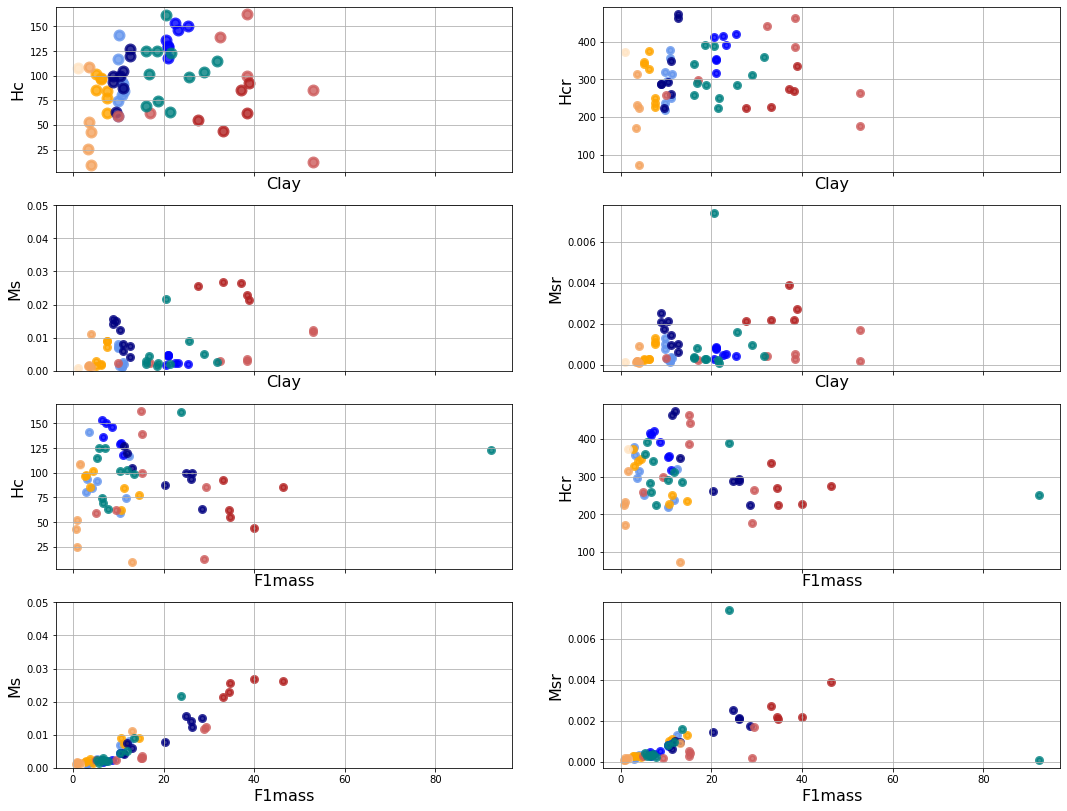

In [ ]:
fig, ((bx1, bx2), (bx3, bx4), (bx5, bx6), (bx7, bx8)) = plt.subplots(4, 2, sharex=True, figsize=(18, 14))

lw = 3

bx1.scatter(dm.Clay[dm['SAMPLE'].str.startswith("P")], dm.Hc[dm['SAMPLE'].str.startswith("P")],  alpha = aa, s=ss, linewidth=lw, c = "cornflowerblue", label = 'P Site')
bx1.scatter(dm.Clay[dm['SAMPLE'].str.startswith("S")], dm.Hc[dm['SAMPLE'].str.startswith("S")],  alpha = aa, s=ss, linewidth=lw, c = "orange", label = 'S Site')
bx1.scatter(dm.Clay[dm['SAMPLE'].str.startswith("E")], dm.Hc[dm['SAMPLE'].str.startswith("E")], alpha = aa, s=ss, linewidth=lw, c = "blue", label = 'E Site' )
bx1.scatter(dm.Clay[dm['SAMPLE'].str.startswith("A")], dm.Hc[dm['SAMPLE'].str.startswith("A")], alpha = aa, s=ss, linewidth=lw,c = "navy", label = 'A Site')
bx1.scatter(dm.Clay[dm['SAMPLE'].str.startswith("HE")], dm.Hc[dm['SAMPLE'].str.startswith("HE")], alpha = aa, s=ss, linewidth=lw,c = "indianred", label = 'HE Site')
bx1.scatter(dm.Clay[dm['SAMPLE'].str.startswith("L")], dm.Hc[dm['SAMPLE'].str.startswith("L")], alpha = aa, s=ss, linewidth=lw,c = "bisque", label = 'L Site')
bx1.scatter(dm.Clay[dm['SAMPLE'].str.startswith("D")], dm.Hc[dm['SAMPLE'].str.startswith("D")], alpha = aa, s=ss, linewidth=lw,c = "firebrick", label = 'Dren Site')
bx1.scatter(dm.Clay[dm['SAMPLE'].str.startswith("V")], dm.Hc[dm['SAMPLE'].str.startswith("V")], alpha = aa, s=ss, linewidth=lw,c = "sandybrown", label = 'Valthe Site')
bx1.scatter(dm.Clay[dm['SAMPLE'].str.startswith("HOEKE")], dm.Hc[dm['SAMPLE'].str.startswith("HOEKE")], alpha = aa, s=ss, linewidth=lw,c = "teal", label = 'Hoeke Site')

bx2.scatter(dm.Clay[dm['SAMPLE'].str.startswith("P")], dm.Hcr[dm['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
bx2.scatter(dm.Clay[dm['SAMPLE'].str.startswith("S")], dm.Hcr[dm['SAMPLE'].str.startswith("S")], alpha=a,linewidth=lw, c = "orange", label = 'S Site')
bx2.scatter(dm.Clay[dm['SAMPLE'].str.startswith("E")], dm.Hcr[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
bx2.scatter(dm.Clay[dm['SAMPLE'].str.startswith("A")], dm.Hcr[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
bx2.scatter(dm.Clay[dm['SAMPLE'].str.startswith("HE")], dm.Hcr[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
bx2.scatter(dm.Clay[dm['SAMPLE'].str.startswith("L")], dm.Hcr[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
bx2.scatter(dm.Clay[dm['SAMPLE'].str.startswith("D")], dm.Hcr[dm['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
bx2.scatter(dm.Clay[dm['SAMPLE'].str.startswith("V")], dm.Hcr[dm['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw,c = "sandybrown", label = 'Valthe Site')
bx2.scatter(dm.Clay[dm['SAMPLE'].str.startswith("HOEKE")], dm.Hcr[dm['SAMPLE'].str.startswith("HOEKE")], alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')

bx3.scatter(dm.Clay[dm['SAMPLE'].str.startswith("P")], dm.Ms[dm['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
bx3.scatter(dm.Clay[dm['SAMPLE'].str.startswith("S")], dm.Ms[dm['SAMPLE'].str.startswith("S")], alpha=a,linewidth=lw, c = "orange", label = 'S Site')
bx3.scatter(dm.Clay[dm['SAMPLE'].str.startswith("E")], dm.Ms[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
bx3.scatter(dm.Clay[dm['SAMPLE'].str.startswith("A")], dm.Ms[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
bx3.scatter(dm.Clay[dm['SAMPLE'].str.startswith("HE")], dm.Ms[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
bx3.scatter(dm.Clay[dm['SAMPLE'].str.startswith("L")], dm.Ms[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
bx3.scatter(dm.Clay[dm['SAMPLE'].str.startswith("D")], dm.Ms[dm['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
bx3.scatter(dm.Clay[dm['SAMPLE'].str.startswith("V")], dm.Ms[dm['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw,c = "sandybrown", label = 'Valthe Site')
bx3.scatter(dm.Clay[dm['SAMPLE'].str.startswith("HOEKE")], dm.Ms[dm['SAMPLE'].str.startswith("HOEKE")],  alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')

bx4.scatter(dm.Clay[dm['SAMPLE'].str.startswith("P")], dm.Mrs[dm['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
bx4.scatter(dm.Clay[dm['SAMPLE'].str.startswith("S")], dm.Mrs[dm['SAMPLE'].str.startswith("S")], alpha=a,linewidth=lw, c = "orange", label = 'S Site')
bx4.scatter(dm.Clay[dm['SAMPLE'].str.startswith("E")], dm.Mrs[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
bx4.scatter(dm.Clay[dm['SAMPLE'].str.startswith("A")], dm.Mrs[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
bx4.scatter(dm.Clay[dm['SAMPLE'].str.startswith("HE")], dm.Mrs[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
bx4.scatter(dm.Clay[dm['SAMPLE'].str.startswith("L")], dm.Mrs[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
bx4.scatter(dm.Clay[dm['SAMPLE'].str.startswith("D")], dm.Mrs[dm['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
bx4.scatter(dm.Clay[dm['SAMPLE'].str.startswith("V")], dm.Mrs[dm['SAMPLE'].str.startswith("V")],  alpha=a,linewidth=lw,c = "sandybrown", label = 'Valthe Site')
bx4.scatter(dm.Clay[dm['SAMPLE'].str.startswith("HOEKE")], dm.Mrs[dm['SAMPLE'].str.startswith("HOEKE")], alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')


bx5.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("P")], dm.Hc[dm['SAMPLE'].str.startswith("P")],  alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
bx5.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("S")], dm.Hc[dm['SAMPLE'].str.startswith("S")],  alpha=a,linewidth=lw, c = "orange", label = 'S Site')
bx5.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("E")], dm.Hc[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
bx5.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("A")], dm.Hc[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
bx5.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("HE")], dm.Hc[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
bx5.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("L")], dm.Hc[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
bx5.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("D")], dm.Hc[dm['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
bx5.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("V")], dm.Hc[dm['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw,c = "sandybrown", label = 'Valthe Site')
bx5.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("HOEKE")], dm.Hc[dm['SAMPLE'].str.startswith("HOEKE")], alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')

bx6.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("P")], dm.Hcr[dm['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
bx6.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("S")], dm.Hcr[dm['SAMPLE'].str.startswith("S")], alpha=a,linewidth=lw, c = "orange", label = 'S Site')
bx6.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("E")], dm.Hcr[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
bx6.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("A")], dm.Hcr[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
bx6.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("HE")], dm.Hcr[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
bx6.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("L")], dm.Hcr[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
bx6.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("D")], dm.Hcr[dm['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
bx6.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("V")], dm.Hcr[dm['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw,c = "sandybrown", label = 'Valthe Site')
bx6.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("HOEKE")], dm.Hcr[dm['SAMPLE'].str.startswith("HOEKE")], alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')

bx7.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("P")], dm.Ms[dm['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
bx7.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("S")], dm.Ms[dm['SAMPLE'].str.startswith("S")], alpha=a,linewidth=lw, c = "orange", label = 'S Site')
bx7.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("E")], dm.Ms[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
bx7.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("A")], dm.Ms[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
bx7.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("HE")], dm.Ms[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
bx7.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("L")], dm.Ms[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
bx7.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("D")], dm.Ms[dm['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
bx7.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("V")], dm.Ms[dm['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw,c = "sandybrown", label = 'Valthe Site')
bx7.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("HOEKE")], dm.Ms[dm['SAMPLE'].str.startswith("HOEKE")],  alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')

bx8.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("P")], dm.Mrs[dm['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
bx8.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("S")], dm.Mrs[dm['SAMPLE'].str.startswith("S")], alpha=a,linewidth=lw, c = "orange", label = 'S Site')
bx8.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("E")], dm.Mrs[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
bx8.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("A")], dm.Mrs[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
bx8.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("HE")], dm.Mrs[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
bx8.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("L")], dm.Mrs[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
bx8.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("D")], dm.Mrs[dm['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
bx8.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("V")], dm.Mrs[dm['SAMPLE'].str.startswith("V")],  alpha=a,linewidth=lw,c = "sandybrown", label = 'Valthe Site')
bx8.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("HOEKE")], dm.Mrs[dm['SAMPLE'].str.startswith("HOEKE")], alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')


bx1.set_xlabel('Clay', fontsize = 16) 
bx1.set_ylabel('Hc', fontsize = 16) 
bx1.grid(True)

bx2.set_ylabel('Hcr', fontsize = 16) 
bx2.set_xlabel('Clay', fontsize = 16) 
bx2.grid(True)

bx3.set_ylabel('Ms', fontsize = 16) 
bx3.set_xlabel('Clay', fontsize = 16)
bx3.set_ylim(0, 0.05) 
bx3.grid(True)

bx4.set_ylabel('Msr', fontsize = 16) 
bx4.set_xlabel('Clay', fontsize = 16) 
bx4.grid(True)


bx5.set_xlabel('F1mass', fontsize = 16) 
bx5.set_ylabel('Hc', fontsize = 16) 
bx5.grid(True)

bx6.set_ylabel('Hcr', fontsize = 16) 
bx6.set_xlabel('F1mass', fontsize = 16) 
bx6.grid(True)

bx7.set_ylabel('Ms', fontsize = 16) 
bx7.set_xlabel('F1mass', fontsize = 16)
bx7.set_ylim(0, 0.05) 

bx7.grid(True)

bx8.set_ylabel('Msr', fontsize = 16) 
bx8.set_xlabel('F1mass', fontsize = 16) 
bx8.grid(True)

(-0.02, 0.02)

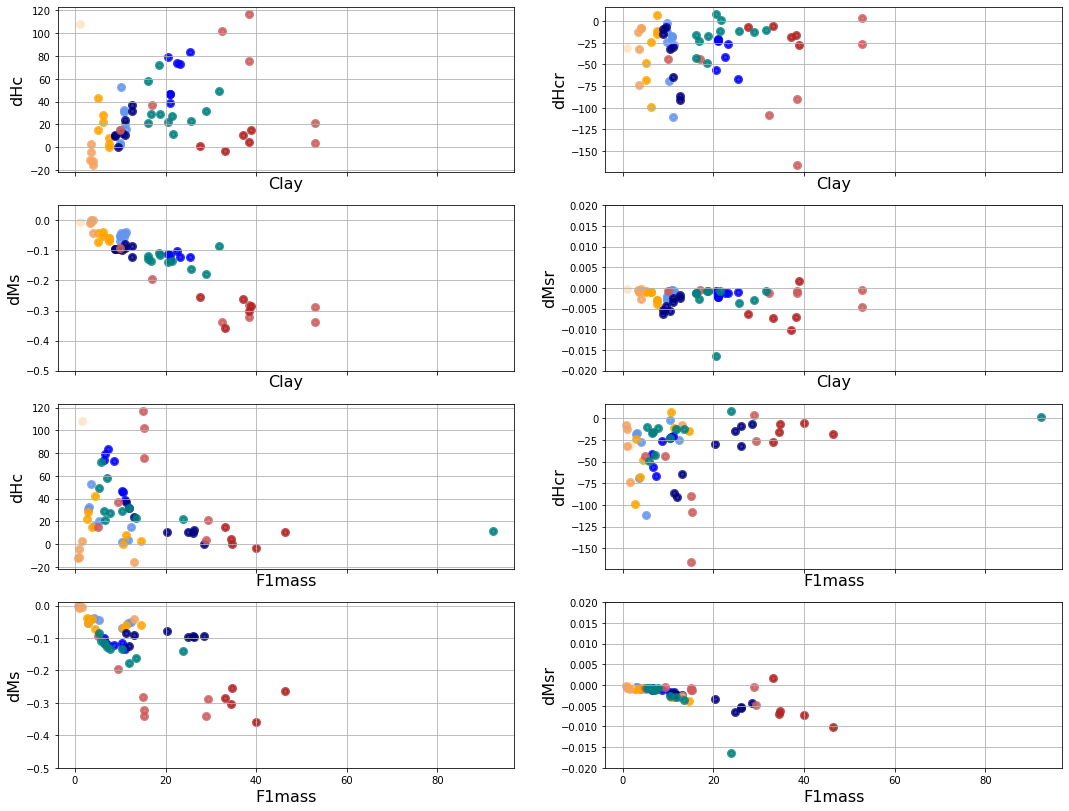

In [ ]:
fig, ((bx1, bx2), (bx3, bx4), (bx5, bx6), (bx7, bx8)) = plt.subplots(4, 2, sharex=True, figsize=(18, 14))

bx1.scatter(dm.Clay[dm['SAMPLE'].str.startswith("P")], dm.dHc[dm['SAMPLE'].str.startswith("P")],  alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
bx1.scatter(dm.Clay[dm['SAMPLE'].str.startswith("S")], dm.dHc[dm['SAMPLE'].str.startswith("S")],  alpha=a,linewidth=lw, c = "orange", label = 'S Site')
bx1.scatter(dm.Clay[dm['SAMPLE'].str.startswith("E")], dm.dHc[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
bx1.scatter(dm.Clay[dm['SAMPLE'].str.startswith("A")], dm.dHc[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
bx1.scatter(dm.Clay[dm['SAMPLE'].str.startswith("HE")], dm.dHc[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
bx1.scatter(dm.Clay[dm['SAMPLE'].str.startswith("L")], dm.dHc[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
bx1.scatter(dm.Clay[dm['SAMPLE'].str.startswith("D")], dm.dHc[dm['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
bx1.scatter(dm.Clay[dm['SAMPLE'].str.startswith("V")], dm.dHc[dm['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw,c = "sandybrown", label = 'Valthe Site')
bx1.scatter(dm.Clay[dm['SAMPLE'].str.startswith("HOEKE")], dm.dHc[dm['SAMPLE'].str.startswith("HOEKE")], alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')

bx2.scatter(dm.Clay[dm['SAMPLE'].str.startswith("P")], dm.dHcr[dm['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
bx2.scatter(dm.Clay[dm['SAMPLE'].str.startswith("S")], dm.dHcr[dm['SAMPLE'].str.startswith("S")], alpha=a,linewidth=lw, c = "orange", label = 'S Site')
bx2.scatter(dm.Clay[dm['SAMPLE'].str.startswith("E")], dm.dHcr[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
bx2.scatter(dm.Clay[dm['SAMPLE'].str.startswith("A")], dm.dHcr[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
bx2.scatter(dm.Clay[dm['SAMPLE'].str.startswith("HE")], dm.dHcr[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
bx2.scatter(dm.Clay[dm['SAMPLE'].str.startswith("L")], dm.dHcr[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
bx2.scatter(dm.Clay[dm['SAMPLE'].str.startswith("D")], dm.dHcr[dm['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
bx2.scatter(dm.Clay[dm['SAMPLE'].str.startswith("V")], dm.dHcr[dm['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw,c = "sandybrown", label = 'Valthe Site')
bx2.scatter(dm.Clay[dm['SAMPLE'].str.startswith("HOEKE")], dm.dHcr[dm['SAMPLE'].str.startswith("HOEKE")], alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')

bx3.scatter(dm.Clay[dm['SAMPLE'].str.startswith("P")], dm.dMs[dm['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
bx3.scatter(dm.Clay[dm['SAMPLE'].str.startswith("S")], dm.dMs[dm['SAMPLE'].str.startswith("S")], alpha=a,linewidth=lw, c = "orange", label = 'S Site')
bx3.scatter(dm.Clay[dm['SAMPLE'].str.startswith("E")], dm.dMs[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
bx3.scatter(dm.Clay[dm['SAMPLE'].str.startswith("A")], dm.dMs[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
bx3.scatter(dm.Clay[dm['SAMPLE'].str.startswith("HE")], dm.dMs[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
bx3.scatter(dm.Clay[dm['SAMPLE'].str.startswith("L")], dm.dMs[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
bx3.scatter(dm.Clay[dm['SAMPLE'].str.startswith("D")], dm.dMs[dm['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
bx3.scatter(dm.Clay[dm['SAMPLE'].str.startswith("V")], dm.dMs[dm['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw,c = "sandybrown", label = 'Valthe Site')
bx3.scatter(dm.Clay[dm['SAMPLE'].str.startswith("HOEKE")], dm.dMs[dm['SAMPLE'].str.startswith("HOEKE")],  alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')

bx4.scatter(dm.Clay[dm['SAMPLE'].str.startswith("P")], dm.dMrs[dm['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
bx4.scatter(dm.Clay[dm['SAMPLE'].str.startswith("S")], dm.dMrs[dm['SAMPLE'].str.startswith("S")], alpha=a,linewidth=lw, c = "orange", label = 'S Site')
bx4.scatter(dm.Clay[dm['SAMPLE'].str.startswith("E")], dm.dMrs[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
bx4.scatter(dm.Clay[dm['SAMPLE'].str.startswith("A")], dm.dMrs[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
bx4.scatter(dm.Clay[dm['SAMPLE'].str.startswith("HE")], dm.dMrs[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
bx4.scatter(dm.Clay[dm['SAMPLE'].str.startswith("L")], dm.dMrs[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
bx4.scatter(dm.Clay[dm['SAMPLE'].str.startswith("D")], dm.dMrs[dm['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
bx4.scatter(dm.Clay[dm['SAMPLE'].str.startswith("V")], dm.dMrs[dm['SAMPLE'].str.startswith("V")],  alpha=a,linewidth=lw,c = "sandybrown", label = 'Valthe Site')
bx4.scatter(dm.Clay[dm['SAMPLE'].str.startswith("HOEKE")], dm.dMrs[dm['SAMPLE'].str.startswith("HOEKE")], alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')


bx5.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("P")], dm.dHc[dm['SAMPLE'].str.startswith("P")],  alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
bx5.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("S")], dm.dHc[dm['SAMPLE'].str.startswith("S")],  alpha=a,linewidth=lw, c = "orange", label = 'S Site')
bx5.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("E")], dm.dHc[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
bx5.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("A")], dm.dHc[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
bx5.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("HE")], dm.dHc[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
bx5.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("L")], dm.dHc[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
bx5.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("D")], dm.dHc[dm['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
bx5.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("V")], dm.dHc[dm['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw,c = "sandybrown", label = 'Valthe Site')
bx5.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("HOEKE")], dm.dHc[dm['SAMPLE'].str.startswith("HOEKE")], alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')

bx6.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("P")], dm.dHcr[dm['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
bx6.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("S")], dm.dHcr[dm['SAMPLE'].str.startswith("S")], alpha=a,linewidth=lw, c = "orange", label = 'S Site')
bx6.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("E")], dm.dHcr[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
bx6.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("A")], dm.dHcr[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
bx6.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("HE")], dm.dHcr[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
bx6.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("L")], dm.dHcr[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
bx6.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("D")], dm.dHcr[dm['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
bx6.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("V")], dm.dHcr[dm['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw,c = "sandybrown", label = 'Valthe Site')
bx6.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("HOEKE")], dm.dHcr[dm['SAMPLE'].str.startswith("HOEKE")], alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')

bx7.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("P")], dm.dMs[dm['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
bx7.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("S")], dm.dMs[dm['SAMPLE'].str.startswith("S")], alpha=a,linewidth=lw, c = "orange", label = 'S Site')
bx7.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("E")], dm.dMs[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
bx7.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("A")], dm.dMs[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
bx7.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("HE")], dm.dMs[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
bx7.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("L")], dm.dMs[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
bx7.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("D")], dm.dMs[dm['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
bx7.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("V")], dm.dMs[dm['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw,c = "sandybrown", label = 'Valthe Site')
bx7.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("HOEKE")], dm.dMs[dm['SAMPLE'].str.startswith("HOEKE")],  alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')

bx8.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("P")], dm.dMrs[dm['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
bx8.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("S")], dm.dMrs[dm['SAMPLE'].str.startswith("S")], alpha=a,linewidth=lw, c = "orange", label = 'S Site')
bx8.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("E")], dm.dMrs[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
bx8.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("A")], dm.dMrs[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
bx8.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("HE")], dm.dMrs[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
bx8.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("L")], dm.dMrs[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
bx8.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("D")], dm.dMrs[dm['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
bx8.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("V")], dm.dMrs[dm['SAMPLE'].str.startswith("V")],  alpha=a,linewidth=lw,c = "sandybrown", label = 'Valthe Site')
bx8.scatter(dm.F1mass[dm['SAMPLE'].str.startswith("HOEKE")], dm.dMrs[dm['SAMPLE'].str.startswith("HOEKE")], alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')


bx1.set_xlabel('Clay', fontsize = 16) 
bx1.set_ylabel('dHc', fontsize = 16) 
bx1.grid(True)

bx2.set_ylabel('dHcr', fontsize = 16) 
bx2.set_xlabel('Clay', fontsize = 16) 
bx2.grid(True)

bx3.set_ylabel('dMs', fontsize = 16) 
bx3.set_xlabel('Clay', fontsize = 16)
bx3.set_ylim(-0.5, 0.05) 
bx3.grid(True)

bx4.set_ylabel('dMsr', fontsize = 16) 
bx4.set_xlabel('Clay', fontsize = 16) 
bx4.grid(True)
bx4.set_ylim(-0.02, 0.02) 


bx5.set_xlabel('F1mass', fontsize = 16) 
bx5.set_ylabel('dHc', fontsize = 16) 
bx5.grid(True)

bx6.set_ylabel('dHcr', fontsize = 16) 
bx6.set_xlabel('F1mass', fontsize = 16) 
bx6.grid(True)

bx7.set_ylabel('dMs', fontsize = 16) 
bx7.set_xlabel('F1mass', fontsize = 16)
bx7.set_ylim(-0.5, 0.01) 
bx7.grid(True)

bx8.set_ylabel('dMsr', fontsize = 16) 
bx8.set_xlabel('F1mass', fontsize = 16) 
bx8.grid(True)
bx8.set_ylim(-0.02, 0.02) 


# FWM

In [ ]:
dm["Mtot"] = 50000e-9*dm.Kre_F1+dm.Mrs*0.0000012566370614359172*dm.Mass/1000
dm["Mrs_rel"] = dm.Mrs*0.0000012566370614359172*dm.Mass*100/(dm.Mtot*1000)

In [ ]:
dm

,Unnamed: 0,SAMPLE,Hcr,Hc,Mrs,Ms,Hcr_unc,Hc_unc,Mrs_unc,Ms_unc,Mmax,Area_loops,S*,NUMBER,Time,Duration,Depth,Kre_F1,Kim_F1,Ph_F1,Time_F1,Date_F1,Mass,#_y,Rg_F3,Kre_F3,Kim_F3,Ph_F3,Time_F3,Date_F3,F1mass,F3mass,kfd_abs,kfd,SiO2,SiO2 Error,MgO,MgO Error,Al2O3,Al2O3 Error,Mo,Mo Error,Zr,Zr Error,Sr,Sr Error,U,U Error,Rb,Rb Error,Th,Th Error,Pb,Pb Error,Au,Au Error,Se,Se Error,As,As Error,Hg,Hg Error,Zn,Zn Error,W,W Error,Cu,Cu Error,Ni,Ni Error,Co,Co Error,Fe,Fe Error,Mn,Mn Error,Cr,Cr Error,V,V Error,Ti,Ti Error,Ca,Ca Error,K,K Error,S,S Error,Ba,Ba Error,Sb,Sb Error,Sn,Sn Error,Cd,Cd Error,Ag,Ag Error,Pd,Pd Error,Bal,Bal Error,Nb,Nb Error,Bi,Bi Error,Re,Re Error,Ta,Ta Error,Hf,Hf Error,Al,Al Error,P,P Error,Si,Si Error,Cl,Cl Error,Mg,Mg Error,Sc,Sc Error,Cs,Cs Error,Te,Te Error,copeky,horizon,Bulk_density,copeky_depth,Carbone,Humus,pH_eau,CEC,Granulom,Clay,Silt_fine,Silt_coarse,Silt,Sand_finr,Sand_coarse,Sand,Battance,CaCO,Hc_T,Hcr_T,Hc_kAm,Hcr_kAm,Hrel,Mrel,SIRM_F1mass,N,Ndemag,Xmd,p,dHcr,dHc,dMrs,dMs,Mtot,Mrs_rel
0,0,A0,287.354,94.142,0.002091,0.014122,296.617,84.307,0.007314,0.109200,9078.99,2.419000,0.136,24,2022-04-14 06:36:00,362.27,0,0.000353,1.820000e-05,2.95,10:31:45,05-04-2022,13.561,774,3,0.000331,7.864000e-07,0.14,11:41:35,07-04-2022,26.060025,24.445100,1.614925,6.606335,794035.25,0,2765.79,0,90163.52,0,10.30,1.54,637.80,3.89,73.91,1.47,0,3.25,63.75,1.59,7.05,1.42,56.95,3.15,0,3.23,0,1.72,8.49,2.50,0.00,4.08,69.26,4.19,0,16.27,28.42,5.53,0.00,16.04,0.00,46.93,17188.51,111.33,391.39,26.31,62.53,5.54,53.43,10.34,4087.96,43.31,4684.52,64.94,13111.13,137.36,351.64,97.78,190.75,23.39,0.0,6.97,0.00,5.61,0.00,6.48,5.18,1.94,0.00,6.05,538347.88,1042.56,12.15,1.0,5.79,1.93,0,1.5,0,1.5,0,1.5,47705.57,1013.65,0.00,2258.73,371044.50,1180.08,0.00,17.41,1666.14,914.39,0.00,9.82,0.0,8.91,0.0,18.75,47,Ap,1.455764,5,11.74,2.348,6.47,6.862481,G22/0061,8.771930,20.733652,55.422649,76.156303,14.130781,0.940989,15.071770,2.253120,0.0,0.009414,0.028735,7.491576,22.866884,3.052346,0.148067,0.000080,5807.431962,4.502248e+04,2.089771e-05,0.451951,-9.263,9.835,-0.005223,-0.095078,1.770563e-08,0.201254
1,1,A14,286.800,99.730,0.002513,0.015593,301.925,89.227,0.008910,0.111150,9000.96,2.720000,0.123,31,2022-04-14 07:48:59.999999,361.06,14,0.000278,2.433000e-05,5.00,11:12:33,05-04-2022,11.198,745,3,0.000255,2.686000e-06,0.60,11:26:56,07-04-2022,24.834792,22.762993,2.071799,9.101608,892157.81,0,5829.41,0,106630.10,0,5.65,1.50,632.87,3.84,74.20,1.45,0,3.23,62.02,1.56,7.78,1.37,36.94,2.71,0,3.21,0,1.74,6.97,2.17,0.00,4.05,56.43,3.93,0,16.47,19.10,5.26,0.00,15.64,0.00,44.60,15515.79,104.75,468.49,27.11,75.79,5.78,73.38,10.87,4516.21,45.37,4182.56,63.46,13401.14,136.90,447.20,38.31,226.02,23.53,0.0,6.97,0.00,5.53,0.00,6.46,0.00,4.19,3.39,1.94,482955.06,1116.45,11.99,1.0,6.13,1.86,0,1.5,0,1.5,0,1.5,56418.04,1130.81,405.42,138.08,416896.16,1064.96,0.00,18.13,3511.69,999.57,0.00,9.43,0.0,8.83,0.0,18.60,47,Ap,1.455764,5,11.74,2.348,6.47,6.862481,G22/0061,8.771930,20.733652,55.422649,76.156303,14.130781,0.940989,15.071770,2.253120,0.0,0.009973,0.028680,7.936254,22.822798,2.875765,0.161162,0.000101,6744.928315,3.968563e+04,2.310458e-05,0.463464,-15.125,10.503,-0.006397,-0.095557,1.394036e-08,0.253670
2,2,A26,224.929,63.505,0.001731,0.014929,231.270,63.185,0.006167,0.109030,9002.65,2.313000,0.174,37,2022-04-14 10:12:00,361.48,26,0.000405,1.585000e-05,2.24,10:43:07,05-04-2022,14.224,791,3,0.000383,-1.301000e-06,-0.19,11:49:18,07-04-2022,28.451912,26.954443,1.497469,5.555556,911963.94,0,4881.66,0,102246.98,0,5.14,1.50,616.19,3.83,73.97,1.47,0,3.32,61.06,1.57,6.84,1.36,37.55,2.75,0,3.30,0,1.76,7.28,2.20,0.00,4.14,53.70,3.92,0,16.49,21.87,5.39,0.00,15.81,0.00,43.29,14437.86,102.04,402.17,26.43,71.07,5.46,68.97,10.17,4199.97,42.38,3675.54,58.50,13276.66,134.33,369.37,37.86,210.75,23.82,0.0,7.01,0.00,5.60,0.00,6.46,0.00,4.24,0.00,5.97,478828.28,1132.33,11.67,1.0,5.77,1.87,0,1.5,0,1.5,0,1.5,54098.93,1102.91,252.97,138.22,426151.34,1076.57,0.00,18.61,2940.76,985.30

In [ ]:
xc4.plot(dm.Hcr[dm['SAMPLE'].str.startswith("P")], -dm.Depth[dm['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
xc4.plot(dm.Hcr[dm['SAMPLE'].str.startswith("S")], -dm.Depth[dm['SAMPLE'].str.startswith("S")], alpha=a,linewidth=lw, c = "orange", label = 'S Site')
xc4.plot(dm.Hcr[dm['SAMPLE'].str.startswith("E")], -dm.Depth[dm['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
xc4.plot(dm.Hcr[dm['SAMPLE'].str.startswith("A")], -dm.Depth[dm['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
xc4.plot(dm.Hcr[dm['SAMPLE'].str.startswith("HE")], -dm.Depth[dm['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
xc4.plot(dm.Hcr[dm['SAMPLE'].str.startswith("L")], -dm.Depth[dm['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
xc4.plot(dm.Hcr[dm['SAMPLE'].str.startswith("D")], -dm.Depth[dm['SAMPLE'].str.startswith("D")],  alpha=a,linewidth=lw,c = "firebrick", label = 'Dren Site')
xc4.plot(dm.Hcr[dm['SAMPLE'].str.startswith("V")], -dm.Depth[dm['SAMPLE'].str.startswith("V")],  alpha=a,linewidth=lw,c = "sandybrown", label = 'Valthe Site')
xc4.plot(dm.Hcr[dm['SAMPLE'].str.startswith("HOEKE")], -dm.Depth[dm['SAMPLE'].str.startswith("HOEKE")],  alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')
